#**Data PreProcessing**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols


# TAMER

In [ ]:
# Read the Excel file into a pandas DataFrame
df = pd.read_excel("/content/Project2_2023-2024.xlsx")

# Now you can work with the DataFrame, which contains the data from the Excel file.
# For example, you can print the first 5 rows of the DataFrame:
display(df.head())

,ID,Sex,Grade,Governorate,Speciality,School_type,Item1,Item2,Item3,Item4,...,Item7,Item8,Item9,Item10,Item11,Item12,Item13,Item14,Item15,Item16
0,ST1,Female,12,Amman,Science,Public,1,1,3,3,...,3,3,1,1,3,3,1,1,3,3
1,ST2,Male,12,As-Salt,Science,Public,1,2,1,3,...,1,3,1,2,1,3,1,2,1,3
2,ST3,Female,9,Amman,NaN,Public,1,1,4,3,...,4,3,1,1,4,3,1,1,4,3
3,ST4,Male,11,Zarqa,Arts,Private,2,2,4,2,...,4,2,2,2,4,2,2,2,4,2
4,ST5,Male,10,Amman,NaN,Private,2,2,2,1,...,2,1,2,2,2,1,2,2,2,1


**Relations between data**

Code below is for 3 things
- Correlation matrix between the items or the 16 marked columns
- Trying to find relationship between the gender and the values inside these 16 coumns
- Trying to see who did more high score male or female

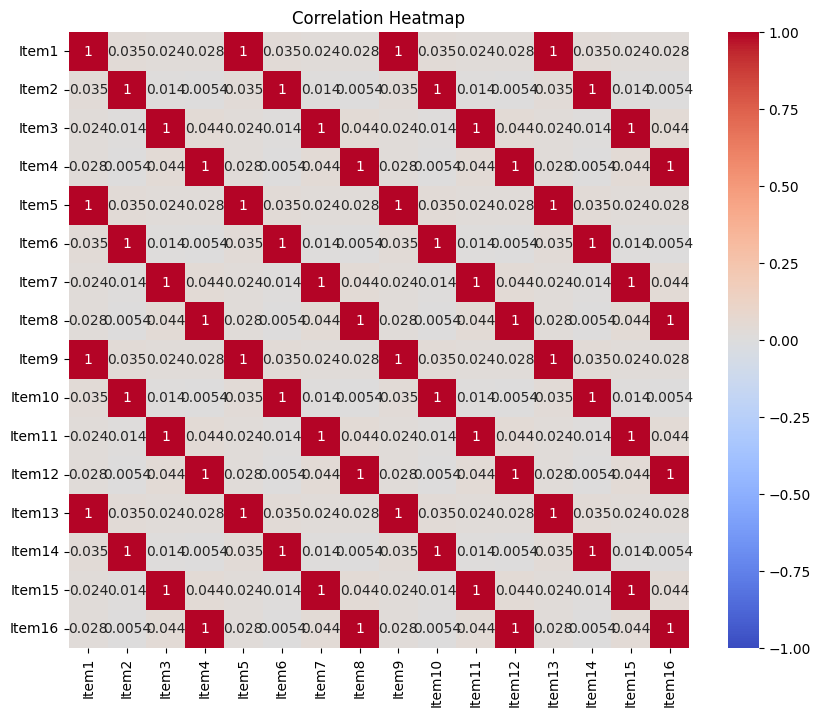

In [ ]:
# Calculate the correlation matrix between those 16 columns

columns = [
    'Item1',
    'Item2',
    'Item3',
    'Item4',
    'Item5',
    'Item6',
    'Item7',
    'Item8',
    'Item9',
    'Item10',
    'Item11',
    'Item12',
    'Item13',
    'Item14',
    'Item15',
    'Item16'
]

new = df[columns]
new.head()
correlation_matrix = new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
"""
Tried to associate the 16 columns to genders and see if there is a relationship but I guess this need more work so dont mind it sm
"""
import scipy.stats as stats


columns = [
    'Item1',
    'Item2',
    'Item3',
    'Item4',
    'Item5',
    'Item6',
    'Item7',
    'Item8',
    'Item9',
    'Item10',
    'Item11',
    'Item12',
    'Item13',
    'Item14',
    'Item15',
    'Item16',
    'Sex'
]

new = df[columns]


# Calculate point-biserial correlation for each column with 'Gender'
correlations = {}

for column in new.columns[:-1]:  # Exclude the 'Gender' column
    correlation, p_value = stats.pointbiserialr(new[column], new['Sex'].eq('Male'))
    correlations[column] = correlation

# Print the correlations
for column, correlation in correlations.items():
    print(f'{column}: Point-Biserial Correlation = {correlation:.2f}')

Item1: Point-Biserial Correlation = -0.04
Item2: Point-Biserial Correlation = 0.00
Item3: Point-Biserial Correlation = -0.00
Item4: Point-Biserial Correlation = -0.00
Item5: Point-Biserial Correlation = -0.04
Item6: Point-Biserial Correlation = 0.00
Item7: Point-Biserial Correlation = -0.00
Item8: Point-Biserial Correlation = -0.00
Item9: Point-Biserial Correlation = -0.04
Item10: Point-Biserial Correlation = 0.00
Item11: Point-Biserial Correlation = -0.00
Item12: Point-Biserial Correlation = -0.00
Item13: Point-Biserial Correlation = -0.04
Item14: Point-Biserial Correlation = 0.00
Item15: Point-Biserial Correlation = -0.00
Item16: Point-Biserial Correlation = -0.00


In [ ]:
#Creating a df that has the total , gender , and the 16 columns
columns = [
    'Item1',
    'Item2',
    'Item3',
    'Item4',
    'Item5',
    'Item6',
    'Item7',
    'Item8',
    'Item9',
    'Item10',
    'Item11',
    'Item12',
    'Item13',
    'Item14',
    'Item15',
    'Item16',
    "Sex"
]
mydf=df[columns]

mydf['Total'] = mydf.sum(axis=1)

newdf = mydf[["Total","Sex"]]
display(newdf.head(5))

<ipython-input-5-4196ace3445a>:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mydf['Total'] = mydf.sum(axis=1)
<ipython-input-5-4196ace3445a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Total'] = mydf.sum(axis=1)


,Total,Sex
0,32,Female
1,28,Male
2,36,Female
3,40,Male
4,28,Male


In [ ]:
#Correlation between the summation and males and females in the df

# Print the DataFrame with the # Calculate the point-biserial correlation between 'Total' and 'Sex'
correlation, p_value = stats.pointbiserialr(newdf['Total'], newdf['Sex'].eq('Male'))
print(f'Point-Biserial Correlation: {correlation:.2f}')

# Determine who has a higher score
male_total = newdf.loc[newdf['Sex'] == 'Male', 'Total'].sum()
female_total = newdf.loc[newdf['Sex'] == 'Female', 'Total'].sum()

if male_total > female_total:
    print('Male has a higher total score.')
    percentage = (male_total - female_total) / male_total * 100
else:
    print('Female has a higher total score.')
    percentage = (female_total - male_total) / female_total * 100

print(f'Percentage difference: {percentage:.2f}%')

Point-Biserial Correlation: -0.02
Female has a higher total score.
Percentage difference: 12.80%



Checking The Relations between [Sex,Grade,Governorate,Speciality,School_type]


**Gender**

Gender Values


In [ ]:
df.tail()

,ID,Sex,Grade,Governorate,Speciality,School_type,Item1,Item2,Item3,Item4,...,Item7,Item8,Item9,Item10,Item11,Item12,Item13,Item14,Item15,Item16
32255,ST32256,Male,10,Kerak,NaN,Public,2,2,1,1,...,1,1,2,2,1,1,2,2,1,1
32256,ST32257,Female,11,Irbid,Science,Public,2,3,1,1,...,1,1,2,3,1,1,2,3,1,1
32257,ST32258,Male,10,Amman,NaN,Private,4,4,2,2,...,2,2,4,4,2,2,4,4,2,2
32258,ST32259,Female,11,Kerak,Science,Public,3,2,3,2,...,3,2,3,2,3,2,3,2,3,2
32259,ST32260,Male,10,Irbid,NaN,Public,2,2,2,3,...,2,3,2,2,2,3,2,2,2,3


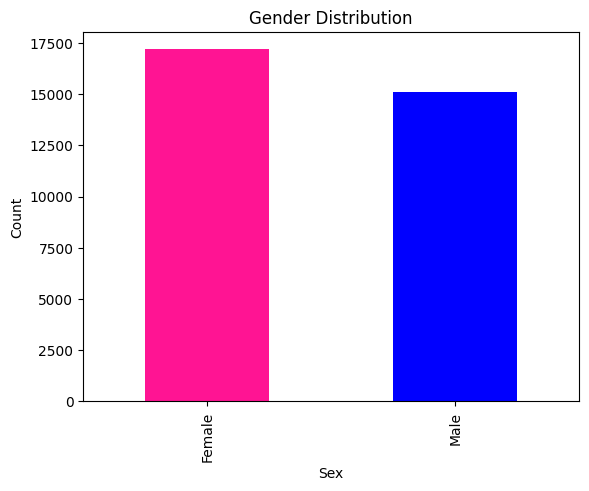

Female    17174
Male      15086
Name: Sex, dtype: int64


In [ ]:
#Checking male or female distribution

gender_distribution = df['Sex'].value_counts()

# Plotting a bar chart for visual representation
gender_distribution.plot(kind='bar', color=['Deeppink', 'blue'])
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Displaying the counts
print(gender_distribution)

Gender with Grade

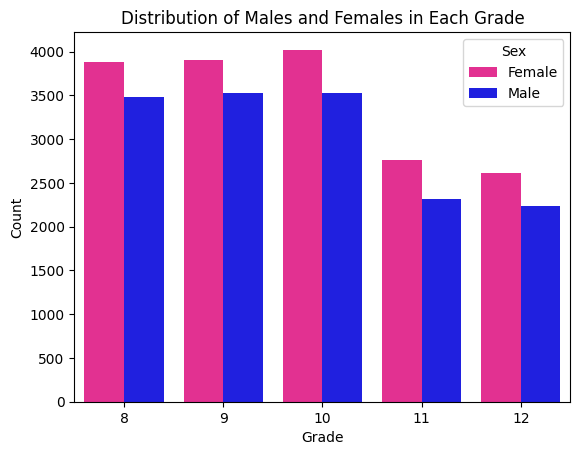

In [ ]:
# Plotting a count plot
sns.countplot(x='Grade', hue='Sex', data=df, palette={'Male': 'blue', 'Female': 'Deeppink'})
plt.title('Distribution of Males and Females in Each Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

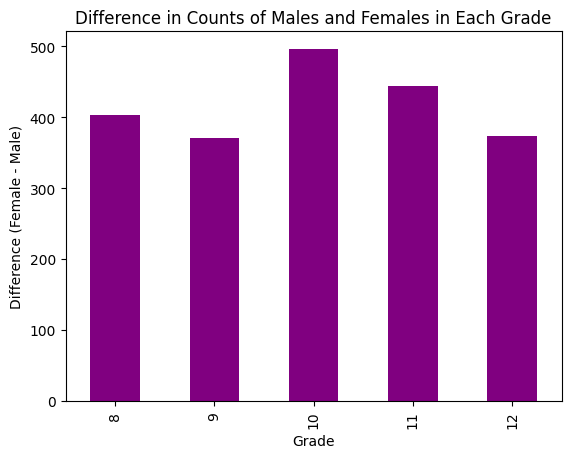

In [ ]:
# Create a cross-tabulation of Grade and Sex
grade_sex_cross_tab = pd.crosstab(df['Grade'], df['Sex'])

# Calculate the difference between male and female counts for each grade
grade_sex_cross_tab['Difference'] = grade_sex_cross_tab['Female'] - grade_sex_cross_tab['Male']

# Plotting a bar plot for the difference
grade_sex_cross_tab['Difference'].plot(kind='bar', color=['purple'])
plt.title('Difference in Counts of Males and Females in Each Grade')
plt.xlabel('Grade')
plt.ylabel('Difference (Female - Male)')
plt.show()

In [ ]:
# Print out the differences for each grade
for grade, difference in grade_sex_cross_tab['Difference'].items():
    print(f'Grade {grade}: Female by {abs(difference)}')

Grade 8: Female by 403
Grade 9: Female by 371
Grade 10: Female by 496
Grade 11: Female by 444
Grade 12: Female by 374


Gender with Governorate

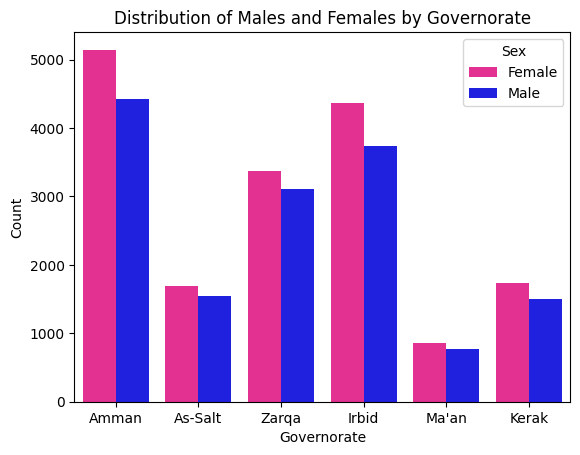

In [ ]:
governorate_order = ['Amman', 'As-Salt', 'Zarqa', 'Irbid', 'Ma\'an', 'Kerak']

# Set a color palette for males and females
colors = {'Male': 'blue', 'Female': 'Deeppink'}

# Create a count plot
sns.countplot(x='Governorate', hue='Sex', data=df, order=governorate_order, palette=colors)

# Set plot labels and title
plt.title('Distribution of Males and Females by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Sex', loc='upper right')

# Show the plot
plt.show()

Gender with Speciality

In [ ]:
## Sex and Speciality

Gender with School_type

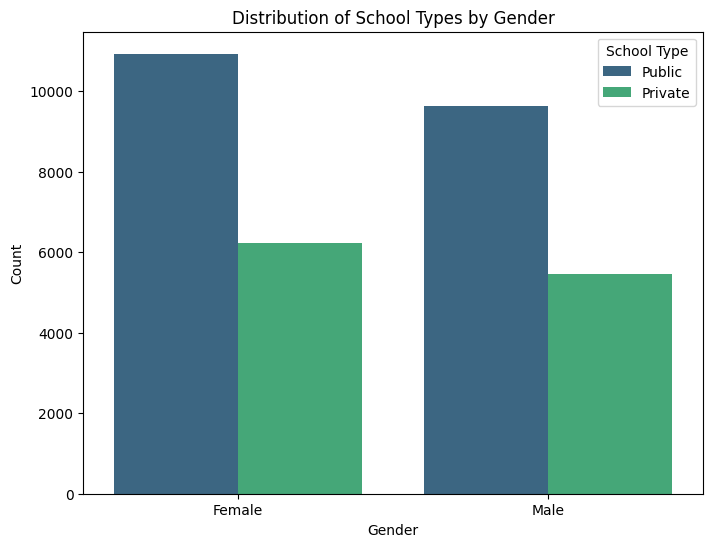

In [ ]:
#Sex and School_type
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='Sex', hue='School_type', data=df, palette='viridis')
plt.title('Distribution of School Types by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='School Type', loc='upper right')  # Add a legend for school types
plt.show()

**Grade**

Grade values Distribution

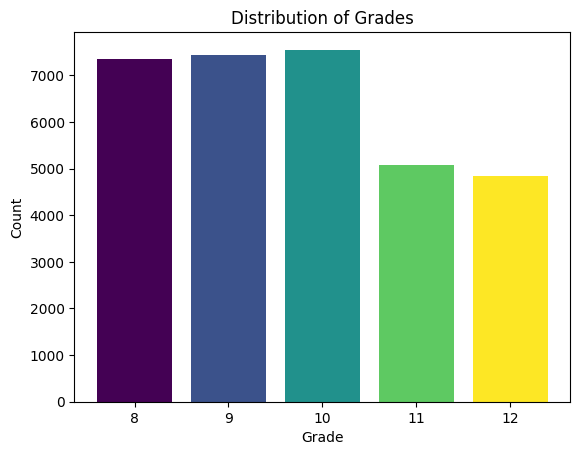

In [ ]:

# Assuming your DataFrame is named df
grade_counts = df['Grade'].value_counts().sort_index()

# Define colors for each grade
colors = plt.cm.viridis(np.linspace(0, 1, len(grade_counts)))

plt.bar(grade_counts.index, grade_counts, color=colors)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

Grade with Governorate



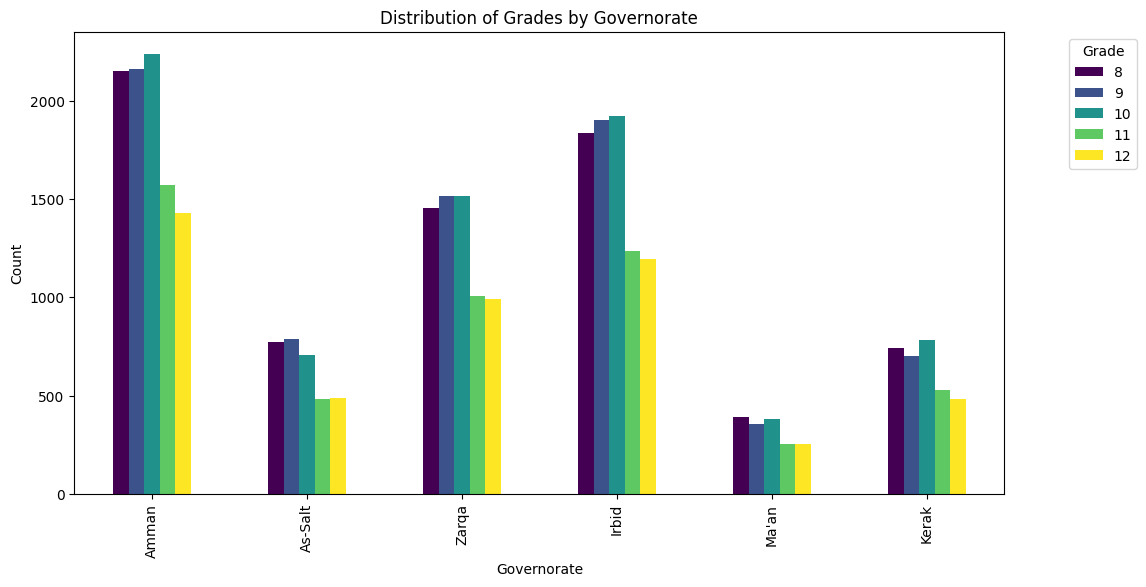

"\nThe distribution of grades varies by governorate.\nOverall, the percentage of students in each grade decreases from grade 8 to grade 12.\nAmman has the highest percentage of students in grades 8, 9, and 10, while Kerak has the highest percentage of students in grades 11 and 12.\nAs-Salt has the lowest percentage of students in grades 8 and 9, while Ma'an has the lowest percentage of students in grades 10 and 11.\nZarqa and Irbid have similar percentages of students in all grades\n\n"

In [ ]:
governorate_order = ['Amman', 'As-Salt', 'Zarqa', 'Irbid', 'Ma\'an', 'Kerak']
grade_order =[8, 9, 10, 11, 12]

# Create a DataFrame with the counts for each combination of governorate and grade
df_counts = pd.crosstab(df['Governorate'], df['Grade']).reindex(governorate_order, columns=grade_order)

# Plot the clustered bar chart
df_counts.plot(kind='bar', colormap='viridis', figsize=(12, 6))
plt.title('Distribution of Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Count')
plt.legend(title='Grade', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

"""
The distribution of grades varies by governorate.
Overall, the percentage of students in each grade decreases from grade 8 to grade 12.
Amman has the highest percentage of students in grades 8, 9, and 10, while Kerak has the highest percentage of students in grades 11 and 12.
As-Salt has the lowest percentage of students in grades 8 and 9, while Ma'an has the lowest percentage of students in grades 10 and 11.
Zarqa and Irbid have similar percentages of students in all grades

"""

Grade with Speciality

In [ ]:
#Nulls

Grade with SchoolType

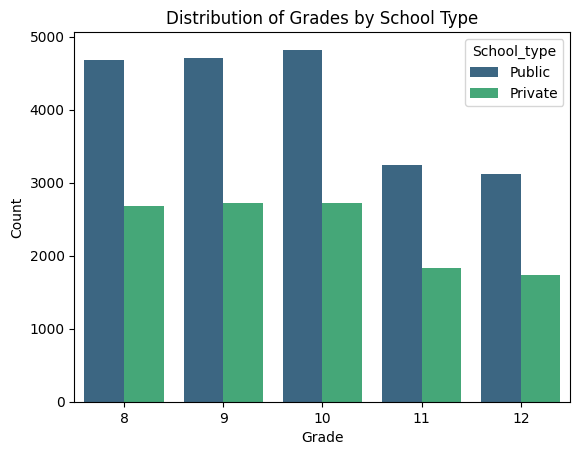

In [ ]:
#Grades with school type
sns.countplot(x='Grade', hue='School_type', data=df, palette='viridis')
plt.title('Distribution of Grades by School Type')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

**Governorate**

Governorate values

In [ ]:
df['Governorate'].value_counts()

Amman      9560
Irbid      8099
Zarqa      6487
As-Salt    3241
Kerak      3238
Ma'an      1635
Name: Governorate, dtype: int64

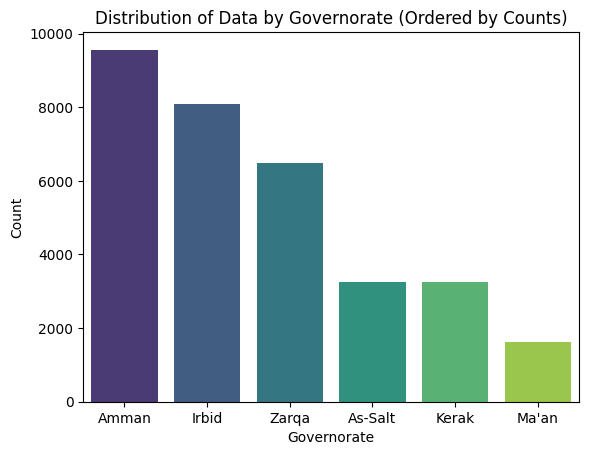

In [ ]:
##Checking Governorate

# Create a DataFrame with the counts for each governorate
df_counts = df['Governorate'].value_counts().reindex(governorate_order)

# Sort the DataFrame by counts in descending order
df_counts = df_counts.sort_values(ascending=False)

# Plot the bar chart
sns.barplot(x=df_counts.index, y=df_counts.values, palette='viridis')
plt.title('Distribution of Data by Governorate (Ordered by Counts)')
plt.xlabel('Governorate')
plt.ylabel('Count')
plt.show()

Governorate with Speciality

In [ ]:
#Nulls

Governorate with Schooltype

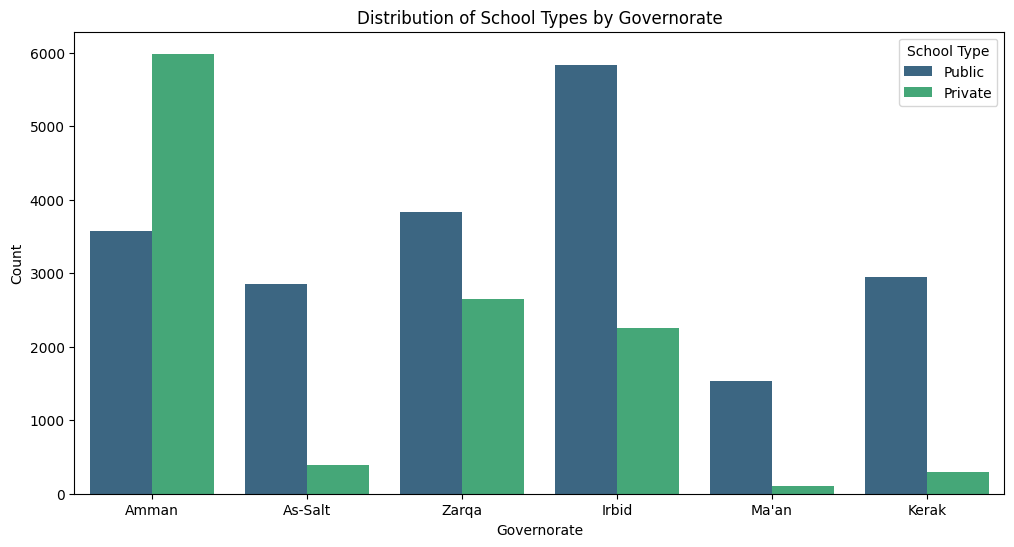

In [ ]:
#Governorate and School_type
# Assuming your DataFrame is named df
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(x='Governorate', hue='School_type', data=df, palette='viridis')
plt.title('Distribution of School Types by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Count')
plt.legend(title='School Type', loc='upper right')  # Add a legend for school types
plt.show()

**Speciality**

In [ ]:
#Nulls

Speciality with SchoolType

In [ ]:
#Nulls

**SchoolType**

SchoolType values


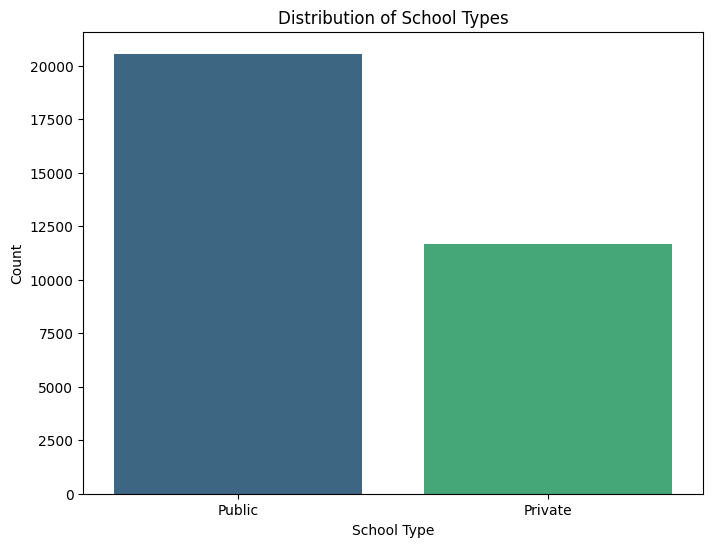

In [ ]:
# Assuming your DataFrame is named df
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='School_type', data=df, palette='viridis')
plt.title('Distribution of School Types')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.show()

# ZAINA

In [ ]:
col=df.columns
col

Index(['ID', 'Sex', 'Grade', 'Governorate', 'Speciality', 'School_type',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
       'Item9', 'Item10', 'Item11', 'Item12', 'Item13', 'Item14', 'Item15',
       'Item16'],
      dtype='object')

In [ ]:
if('Grade'==11 or 'Grade'==12 ):
  df['Speciality'].fillna(df['Speciality'].mode().iloc[0], inplace=True)
else:
  df['Speciality'].fillna('Others',inplace=True)

In [ ]:
df['Speciality'].unique()

array(['Science', 'Others', 'Arts', 'Industrial'], dtype=object)

To fill the null values in the speciality column we have to look at the grade column, if the grade colum is less than 11 fill the speciality with Other, if the grade is 11 or 12 we fill the null with the most common value (mode).

In [ ]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

To make sure we either have 'Female' or 'Male' as specified in the data dictionary

In [ ]:
c=0
if(df['Grade'][1]<6 or df['Grade'][1]>12):
  c=c+1
print(c)

0


To make sure all the grades in the column are between 6 and 12

In [ ]:
df['School_type'].unique()

array(['Public', 'Private'], dtype=object)

To make sure our data has either 'Public' or 'Private' as specified in the data dictionary

In [ ]:
df['Governorate'].unique()

array(['Amman', 'As-Salt', 'Zarqa', 'Irbid', "Ma'an", 'Kerak'],
      dtype=object)

To make sure the data we have is as specified in the data dictionary

In [ ]:
df['Joy_of_Learning'] = df[['Item1', 'Item5', 'Item9', 'Item13']].sum(axis=1)
df['School_Connectedness']=df[['Item2', 'Item6', 'Item10', 'Item14']].sum(axis=1)
df['Educational Purpose']=df[['Item3', 'Item7', 'Item11', 'Item15']].sum(axis=1)
df['Academic_Efficacy']=df[['Item4', 'Item8', 'Item12', 'Item16']].sum(axis=1)

for the new columns
4–5 = almost never
6–9 = sometimes
10–13 = often
14–16 = almost always


In [ ]:
df['Student_Wellbeing']=df[['Joy_of_Learning','School_Connectedness','Educational Purpose','Academic_Efficacy']].sum(axis=1)

In [ ]:
df.head()

,ID,Sex,Grade,Governorate,Speciality,School_type,Item1,Item2,Item3,Item4,...,Item12,Item13,Item14,Item15,Item16,Joy_of_Learning,School_Connectedness,Educational Purpose,Academic_Efficacy,Student_Wellbeing
0,ST1,Female,12,Amman,Science,Public,1,1,3,3,...,3,1,1,3,3,4,4,12,12,32
1,ST2,Male,12,As-Salt,Science,Public,1,2,1,3,...,3,1,2,1,3,4,8,4,12,28
2,ST3,Female,9,Amman,Others,Public,1,1,4,3,...,3,1,1,4,3,4,4,16,12,36
3,ST4,Male,11,Zarqa,Arts,Private,2,2,4,2,...,2,2,2,4,2,8,8,16,8,40
4,ST5,Male,10,Amman,Others,Private,2,2,2,1,...,1,2,2,2,1,8,8,8,4,28


for the student wellveing column
16–23 = almost never
24–39 = sometimes
40–55 = often
56–64 = almost always

In [ ]:
df.describe()

,Grade,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,...,Item12,Item13,Item14,Item15,Item16,Joy_of_Learning,School_Connectedness,Educational Purpose,Academic_Efficacy,Student_Wellbeing
count,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,...,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000,32260.000000
mean,9.771699,2.050496,2.160787,2.298574,2.392467,2.050496,2.160787,2.298574,2.392467,2.050496,...,2.392467,2.050496,2.160787,2.298574,2.392467,8.201984,8.643149,9.194296,9.569870,35.609299
std,1.359764,0.786577,0.844840,0.899248,0.937886,0.786577,0.844840,0.899248,0.937886,0.786577,...,0.937886,0.786577,0.844840,0.899248,0.937886,3.146307,3.379359,3.596991,3.751543,7.207025
min,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,16.000000
25%,9.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,8.000000,8.000000,8.000000,32.000000
50%,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,8.000000,8.000000,8.000000,36.000000
75%,11.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,8.000000,12.000000,12.000000,12.000000,40.000000
max,12.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,16.000000,16.000000,16.000000,16.000000,64.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32260 entries, 0 to 32259
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    32260 non-null  object
 1   Sex                   32260 non-null  object
 2   Grade                 32260 non-null  int64 
 3   Governorate           32260 non-null  object
 4   Speciality            32260 non-null  object
 5   School_type           32260 non-null  object
 6   Item1                 32260 non-null  int64 
 7   Item2                 32260 non-null  int64 
 8   Item3                 32260 non-null  int64 
 9   Item4                 32260 non-null  int64 
 10  Item5                 32260 non-null  int64 
 11  Item6                 32260 non-null  int64 
 12  Item7                 32260 non-null  int64 
 13  Item8                 32260 non-null  int64 
 14  Item9                 32260 non-null  int64 
 15  Item10                32260 non-null

In [ ]:
df.head()

,ID,Sex,Grade,Governorate,Speciality,School_type,Item1,Item2,Item3,Item4,...,Item12,Item13,Item14,Item15,Item16,Joy_of_Learning,School_Connectedness,Educational Purpose,Academic_Efficacy,Student_Wellbeing
0,ST1,Female,12,Amman,Science,Public,1,1,3,3,...,3,1,1,3,3,4,4,12,12,32
1,ST2,Male,12,As-Salt,Science,Public,1,2,1,3,...,3,1,2,1,3,4,8,4,12,28
2,ST3,Female,9,Amman,Others,Public,1,1,4,3,...,3,1,1,4,3,4,4,16,12,36
3,ST4,Male,11,Zarqa,Arts,Private,2,2,4,2,...,2,2,2,4,2,8,8,16,8,40
4,ST5,Male,10,Amman,Others,Private,2,2,2,1,...,1,2,2,2,1,8,8,8,4,28


In [ ]:
df

,ID,Sex,Grade,Governorate,Speciality,School_type,Item1,Item2,Item3,Item4,...,Item12,Item13,Item14,Item15,Item16,Joy_of_Learning,School_Connectedness,Educational Purpose,Academic_Efficacy,Student_Wellbeing
0,ST1,Female,12,Amman,Science,Public,1,1,3,3,...,3,1,1,3,3,4,4,12,12,32
1,ST2,Male,12,As-Salt,Science,Public,1,2,1,3,...,3,1,2,1,3,4,8,4,12,28
2,ST3,Female,9,Amman,Others,Public,1,1,4,3,...,3,1,1,4,3,4,4,16,12,36
3,ST4,Male,11,Zarqa,Arts,Private,2,2,4,2,...,2,2,2,4,2,8,8,16,8,40
4,ST5,Male,10,Amman,Others,Private,2,2,2,1,...,1,2,2,2,1,8,8,8,4,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32255,ST32256,Male,10,Kerak,Others,Public,2,2,1,1,...,1,2,2,1,1,8,8,4,4,24
32256,ST32257,Female,11,Irbid,Science,Public,2,3,1,1,...,1,2,3,1,1,8,12,4,4,28
32257,ST32258,Male,10,Amman,Others,Private,4,4,2,2,...,2,4,4,2,2,16,16,8,8,48
32258,ST32259,Female,11,Kerak,Science,Public,3,2,3,2,...,2,3,2,3,2,12,8,12,8,40


# HIBA

**ANOVA**

In [ ]:
df.to_csv("CleanedData.csv", index=False)

In [ ]:
import scipy.stats as stats

# Defining the variables for analysis
grouping_variables = ['School_type', 'Sex', 'Governorate', 'Speciality']

# Correcting the names with extra spaces
dependent_variables= ['Joy_of_Learning', 'School_Connectedness', 'Educational Purpose', 'Academic_Efficacy', 'Student_Wellbeing']

# Redo the ANOVA tests with corrected variable names
anova_results_df= {}

for group_var in grouping_variables:
    for dep_var in dependent_variables:
        # Conduct ANOVA
        anova = stats.f_oneway(*[df[df[group_var] == group][dep_var] for group in df[group_var].unique()])
        # Store results
        anova_results_df[(group_var, dep_var.strip())] = anova

# Format the results for display
anova_results_formatted= {f"{group_var} - {dep_var}": {"F-statistic": result.statistic, "p-value": result.pvalue} for (group_var, dep_var), result in anova_results_df.items()}
anova_results_formatted


{'School_type - Joy_of_Learning': {'F-statistic': 34.48488742353734,
  'p-value': 4.33777218873937e-09},
 'School_type - School_Connectedness': {'F-statistic': 3.8476561345884113,
  'p-value': 0.049824147341915176},
 'School_type - Educational Purpose': {'F-statistic': 0.21584874969607962,
  'p-value': 0.6422244675212458},
 'School_type - Academic_Efficacy': {'F-statistic': 4.526403282981179,
  'p-value': 0.03338325606397845},
 'School_type - Student_Wellbeing': {'F-statistic': 23.26130299810697,
  'p-value': 1.4206124295628037e-06},
 'Sex - Joy_of_Learning': {'F-statistic': 48.546037079830874,
  'p-value': 3.288113175139175e-12},
 'Sex - School_Connectedness': {'F-statistic': 0.0723266510764146,
  'p-value': 0.7879805401164629},
 'Sex - Educational Purpose': {'F-statistic': 0.0002556934633053692,
  'p-value': 0.9872421350829802},
 'Sex - Academic_Efficacy': {'F-statistic': 0.3505423264047095,
  'p-value': 0.5538104422383203},
 'Sex - Student_Wellbeing': {'F-statistic': 10.433188790285

In [ ]:
# Transforming to DataFrame
anova_results_df = pd.DataFrame.from_dict(anova_results_formatted, orient='index')
anova_results_df.reset_index(inplace=True)
anova_results_df.rename(columns={'index': 'Analysis'}, inplace=True)
anova_results_df[['Grouping Variable', 'Dependent Variable']] = anova_results_df['Analysis'].str.split(' - ', expand=True)
anova_results_df.drop('Analysis', axis=1, inplace=True)
anova_results_df = anova_results_df[['Grouping Variable', 'Dependent Variable', 'F-statistic', 'p-value']]
anova_results_df.head()


,Grouping Variable,Dependent Variable,F-statistic,p-value
0,School_type,Joy_of_Learning,34.484887,4.337772e-09
1,School_type,School_Connectedness,3.847656,4.982415e-02
2,School_type,Educational Purpose,0.215849,6.422245e-01
3,School_type,Academic_Efficacy,4.526403,3.338326e-02
4,School_type,Student_Wellbeing,23.261303,1.420612e-06


High F-statistic: If the F-statistic is much larger than 1, it suggests that there are significant differences among the group means. This could lead to rejecting the null hypothesis of the ANOVA test (which states that all group means are equal).
Low F-statistic: Conversely, if the F-statistic is close to 1, it suggests that the variances are similar, and there might be no significant difference between the group means.

**BoxPlots**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(style="whitegrid")

def boxplot(var):
  fig, axes = plt.subplots(nrows=1, ncols=len(grouping_variables), figsize=(20, 5))
  for i, group_var in enumerate(grouping_variables):
    sns.boxplot(x=group_var, y=f'{var}', data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{var} Across {group_var}')
    axes[i].grid(False)

  plt.tight_layout()
  plt.show()


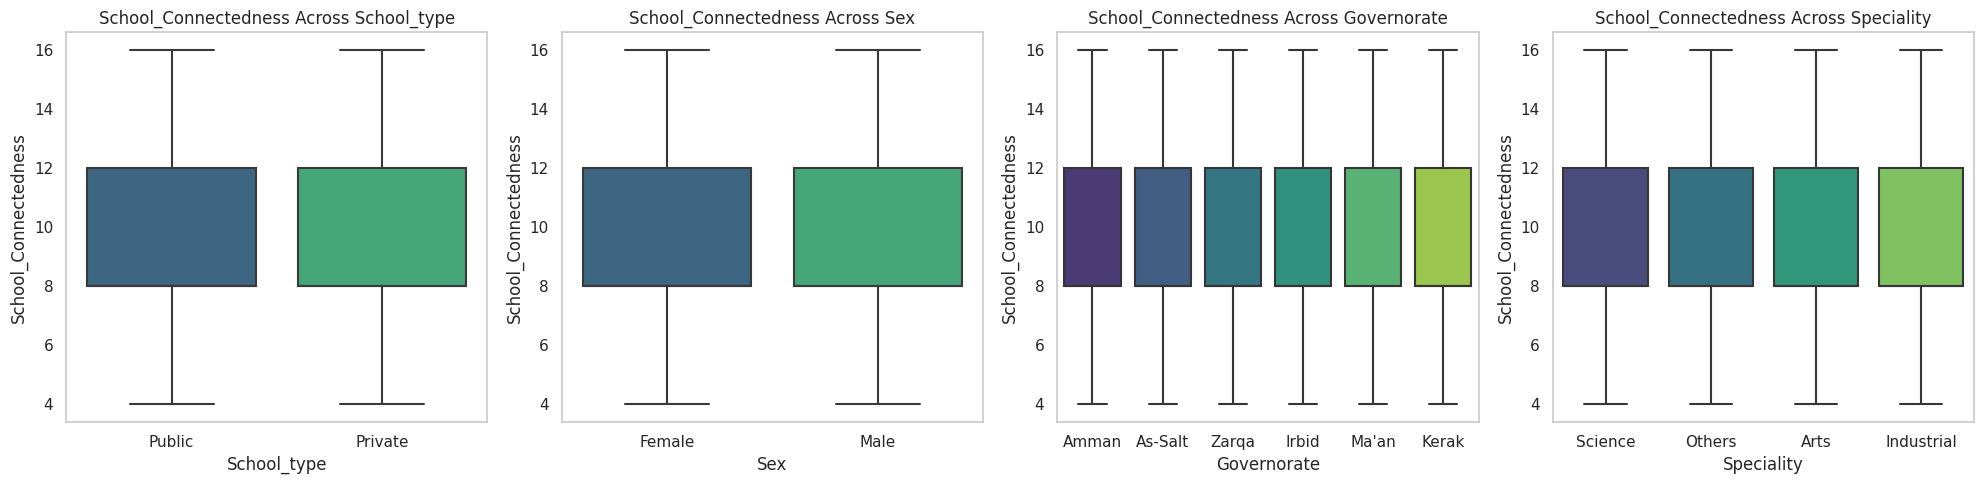

In [ ]:
boxplot("School_Connectedness")

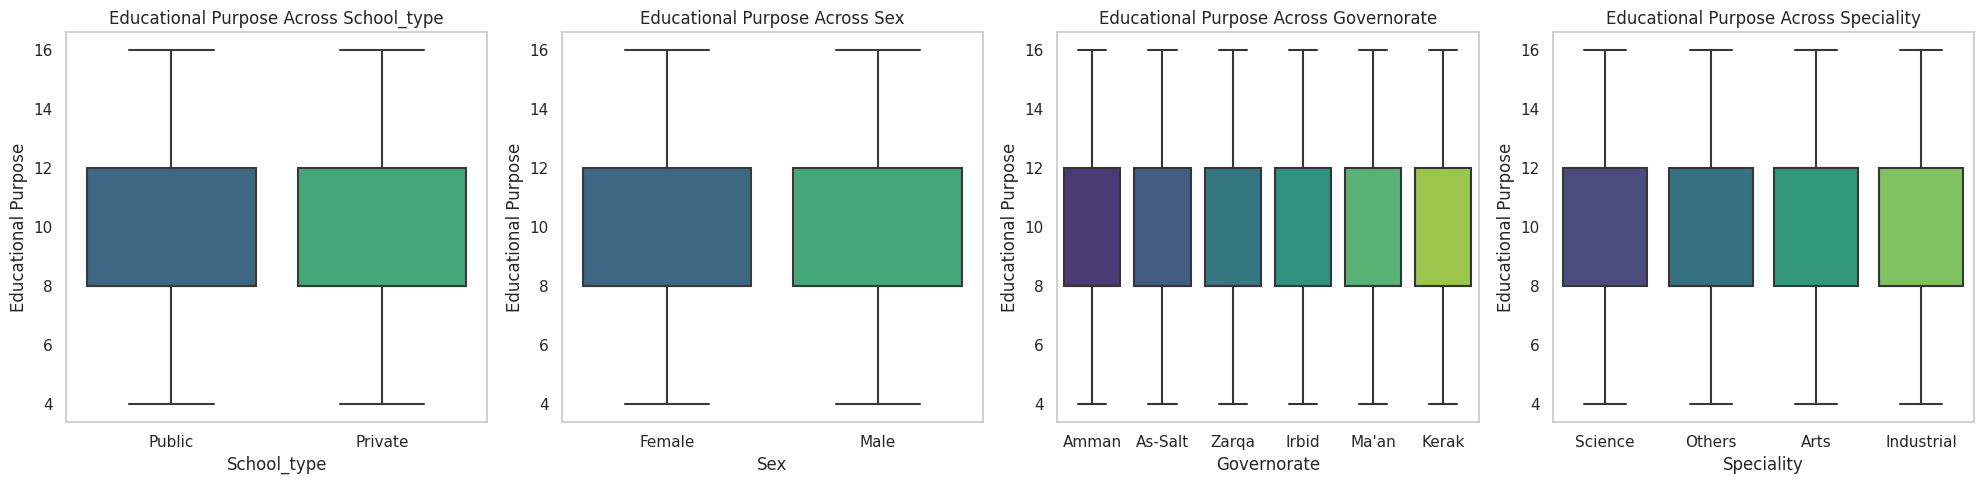

In [ ]:
boxplot("Educational Purpose")

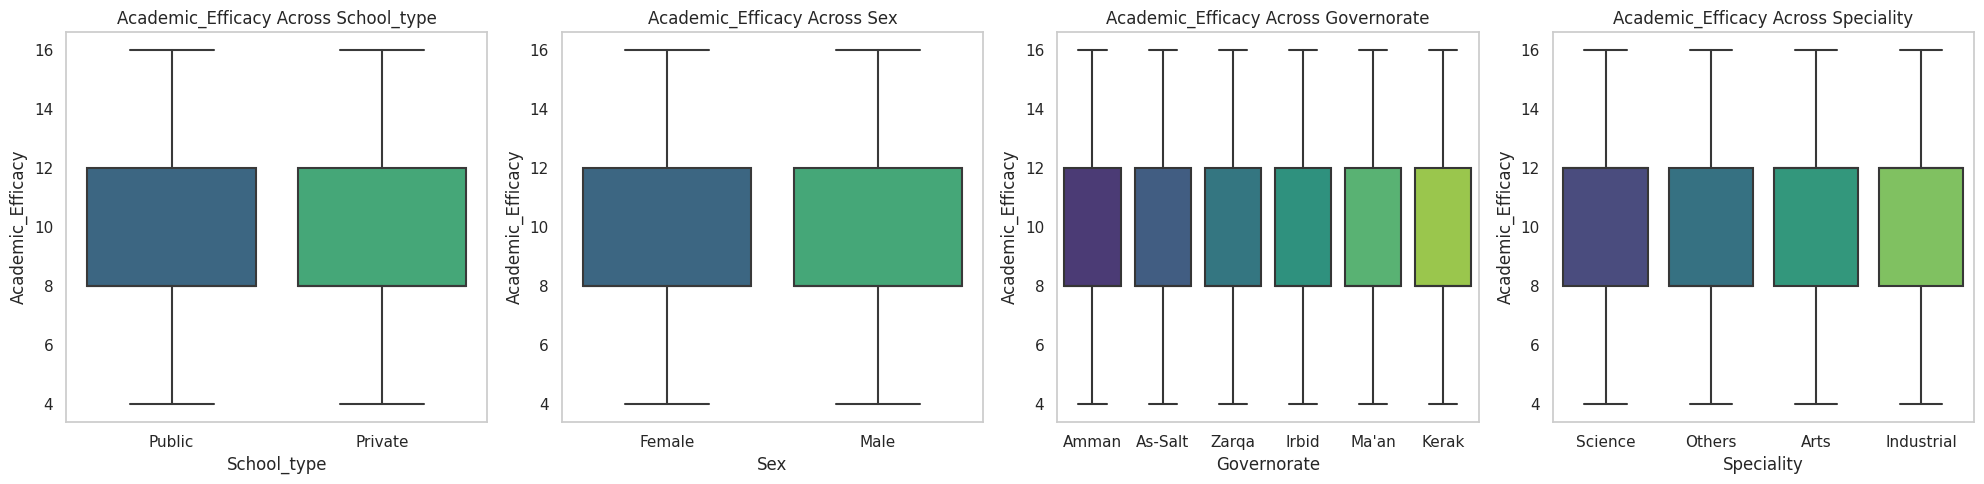

In [ ]:
boxplot("Academic_Efficacy")

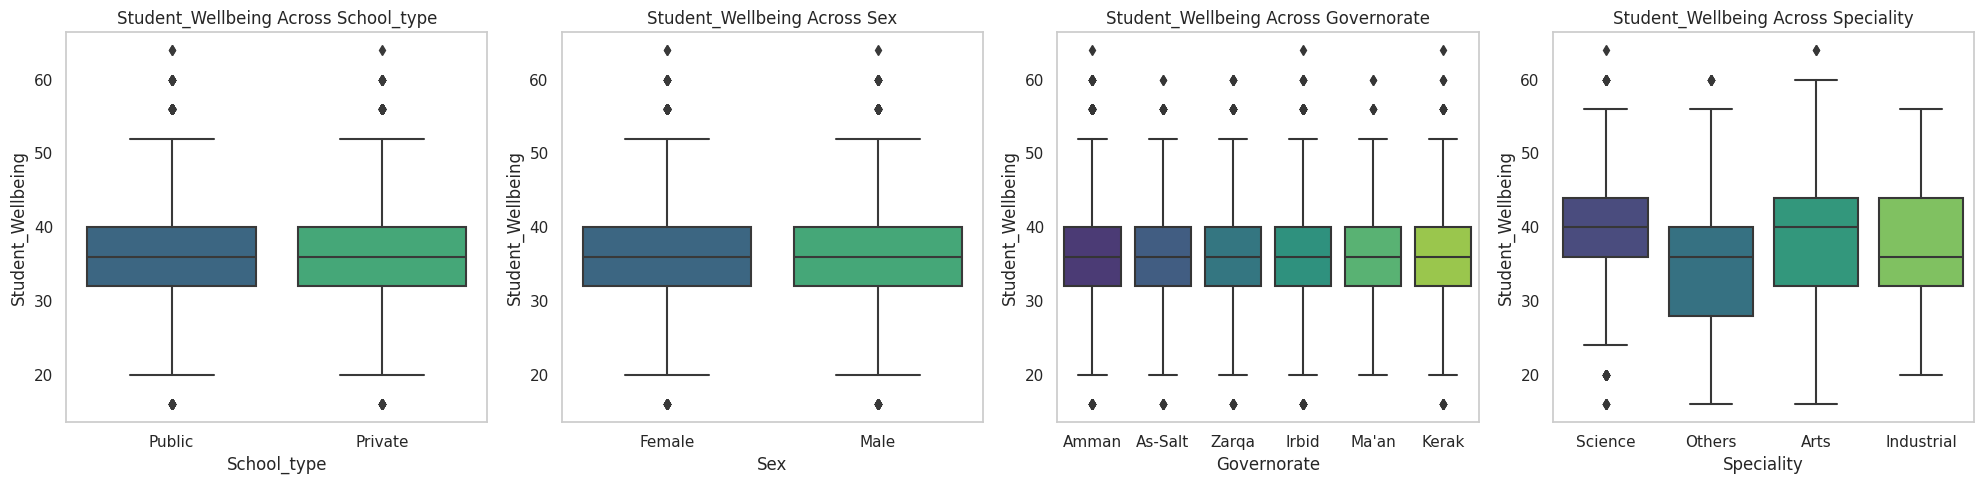

In [ ]:
boxplot("Student_Wellbeing")

**Interaction Plots**

In [ ]:
"""
from itertools import combinations

grouping_var_pairs = list(combinations(grouping_variables, 2))

def interaction_plot(var):
  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
  axes = axes.flatten()

  for i, (var1, var2) in enumerate(grouping_var_pairs):
    unique_levels = df[var2].nunique()
    colors = sns.color_palette("muted", unique_levels)

    # Creating the interaction plot
    sm.graphics.interaction_plot(x=df[var1], trace=df[var2], response=df[var], ax=axes[i], colors=colors)
    axes[i].set_title(f'{var}: Interaction of {var1} and {var2}')
    axes[i].set_ylabel(f'{var}')

  plt.tight_layout()
  plt.show()
  """

'\nfrom itertools import combinations\n\ngrouping_var_pairs = list(combinations(grouping_variables, 2))\n\ndef interaction_plot(var):\n  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))\n  axes = axes.flatten()\n\n  for i, (var1, var2) in enumerate(grouping_var_pairs):\n    unique_levels = df[var2].nunique()\n    colors = sns.color_palette("muted", unique_levels)\n\n    # Creating the interaction plot\n    sm.graphics.interaction_plot(x=df[var1], trace=df[var2], response=df[var], ax=axes[i], colors=colors)\n    axes[i].set_title(f\'{var}: Interaction of {var1} and {var2}\')\n    axes[i].set_ylabel(f\'{var}\')\n\n  plt.tight_layout()\n  plt.show()\n  '

In [ ]:
#interaction_plot("Student_Wellbeing ")

In [ ]:
#interaction_plot("Joy_of_Learning")

In [ ]:
#interaction_plot("Academic_Efficacy")

In [ ]:
#interaction_plot("Educational Purpose ")

In [ ]:
#interaction_plot("School_Connectedness")

#CELINE

In [ ]:
# Correlations
# gender and speciality

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Sex'], df['Speciality'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
print(f"\nSignificance level: {alpha}")
print("The variables are " + ("independent" if p > alpha else "dependent"))

Chi-square value: 285.8253374963572
P-value: 1.1623008035572134e-61

Significance level: 0.05
The variables are dependent


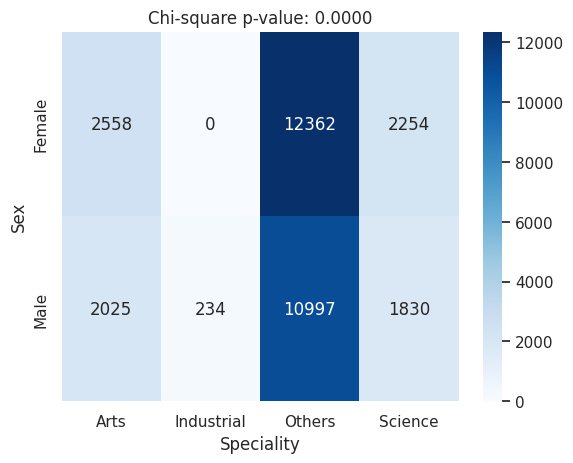

In [ ]:
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title(f'Chi-square p-value: {p:.4f}')
plt.show()

In [ ]:
# speciality and school type
contingency_table = pd.crosstab(df['Speciality'], df['School_type'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
print(f"\nSignificance level: {alpha}")
print("The variables are " + ("independent" if p > alpha else "dependent"))

Chi-square value: 4.530278114154652
P-value: 0.20960539690461855

Significance level: 0.05
The variables are independent


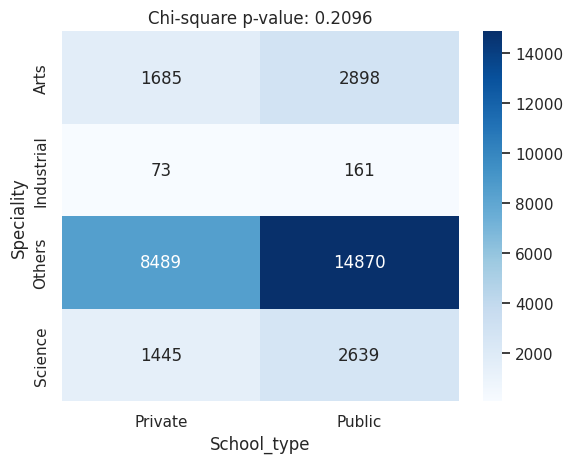

In [ ]:
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title(f'Chi-square p-value: {p:.4f}')
plt.show()

In [ ]:
# grade with speciality
contingency_table = pd.crosstab(df['Grade'], df['Speciality'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 27662.417567701385
P-value: 0.0


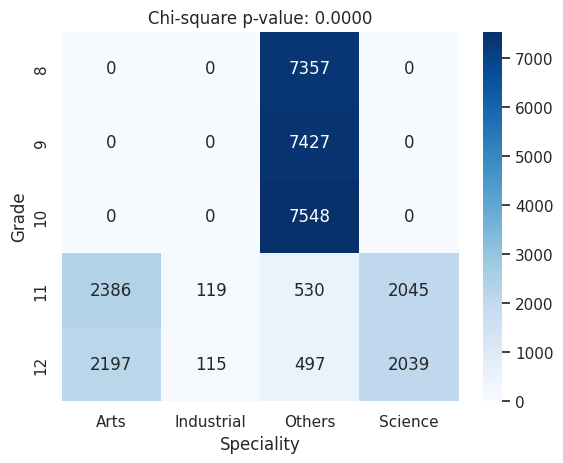

In [ ]:
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title(f'Chi-square p-value: {p:.4f}')
plt.show()

In [ ]:
# governorate and spiecality
contingency_table = pd.crosstab(df['Governorate'], df['Speciality'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 10.322687571818935
P-value: 0.7989660551845399


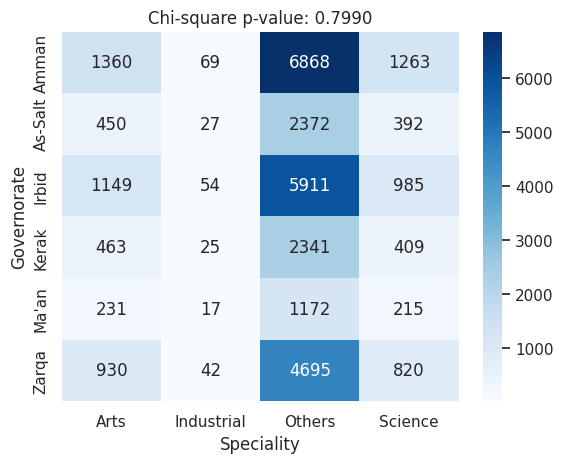

In [ ]:
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title(f'Chi-square p-value: {p:.4f}')
plt.show()

# HAMZA

In [ ]:
# Linear Regression
# The sum of columns for each category
JoyOfL= df['Item1']+df['Item5']+df['Item9']+df['Item13']
SchoolCon= df['Item2']+df['Item6']+df['Item10']+df['Item14']
eduPor=df['Item3']+df['Item7']+df['Item11']+df['Item15']
academic=df['Item4']+df['Item8']+df['Item12']+df['Item16']

Coefficients: [0.1061632]
Intercept: 9.55579496002441
Mean Squared Error: 1.8220136895082302


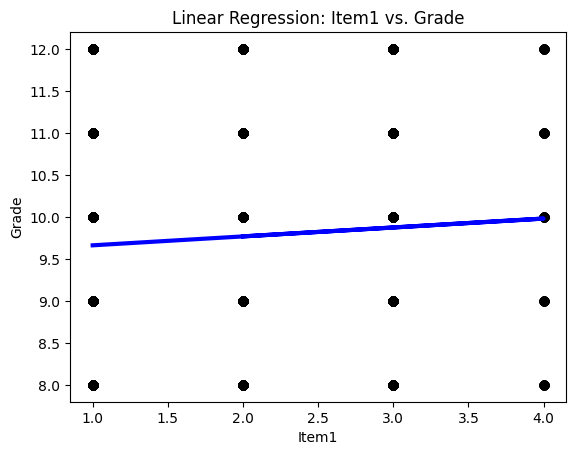

There is no regression


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Item1']]
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Item1')
plt.ylabel('Grade')
plt.title('Linear Regression: Item1 vs. Grade')
plt.show()
print("There is no Regression")

Coefficients: [0.1061632]
Intercept: 9.55579496002441
Mean Squared Error: 1.8220136895082302


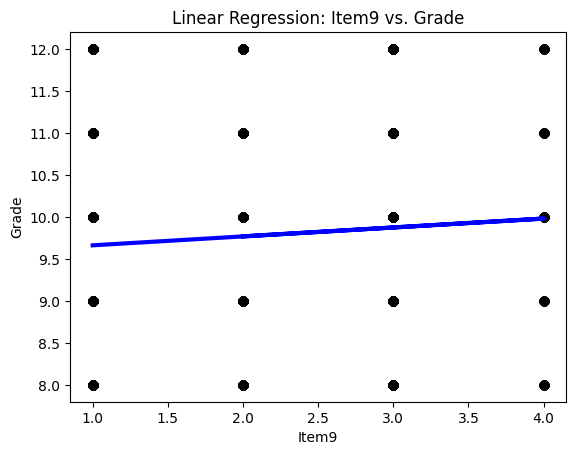

In [47]:
X = df[['Item9']]
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Item9')
plt.ylabel('Grade')
plt.title('Linear Regression: Item9 vs. Grade')
plt.show()

Coefficients: [0.05332863]
Intercept: 9.658177628318695
Mean Squared Error: 1.82699141218729
Type of correlation: Weak positive correlation


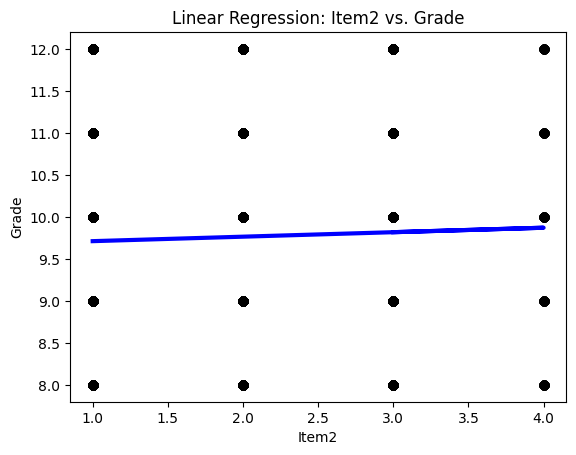

In [48]:
X = df[['Item2']]
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print("Type of correlation: Weak positive correlation")
# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Item2')
plt.ylabel('Grade')
plt.title('Linear Regression: Item2 vs. Grade')
plt.show()

Coefficients: [0.05332863]
Intercept: 9.658177628318695
Mean Squared Error: 1.82699141218729


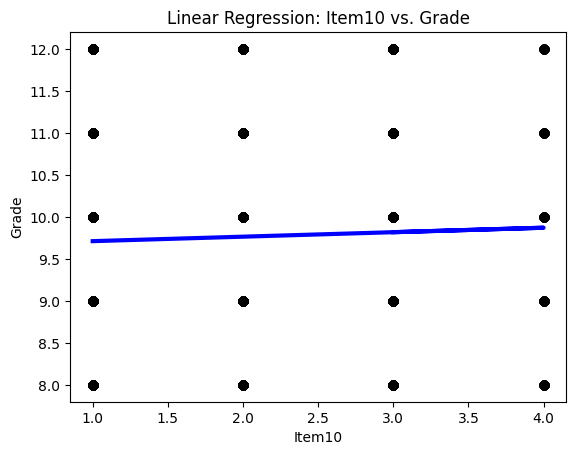

In [49]:
X = df[['Item10']]
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Item10')
plt.ylabel('Grade')
plt.title('Linear Regression: Item10 vs. Grade')
plt.show()

Coefficients: [0.23935176]
Intercept: 9.223325904795612
Mean Squared Error: 1.7657884445758383


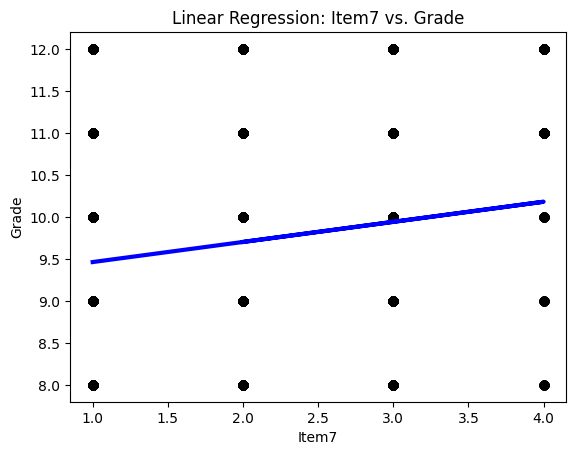

In [50]:
X = df[['Item7']]
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Item7')
plt.ylabel('Grade')
plt.title('Linear Regression: Item7 vs. Grade')
plt.show()

Coefficients: [0.23935176]
Intercept: 9.223325904795612
Mean Squared Error: 1.7657884445758383


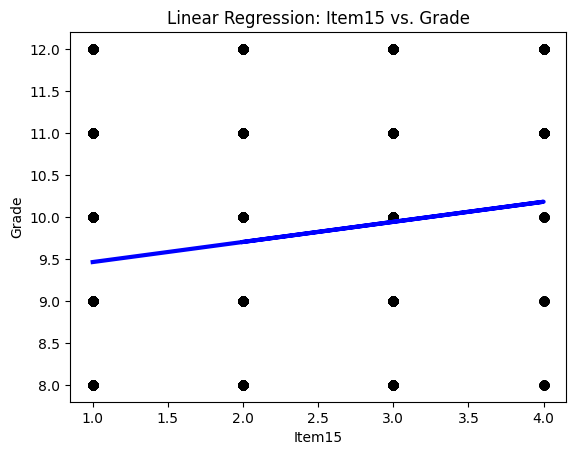

In [51]:
X = df[['Item15']]
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Item15')
plt.ylabel('Grade')
plt.title('Linear Regression: Item15 vs. Grade')
plt.show()

Coefficients: [0.23949577]
Intercept: 9.199377701201104
Mean Squared Error: 1.775806720328525


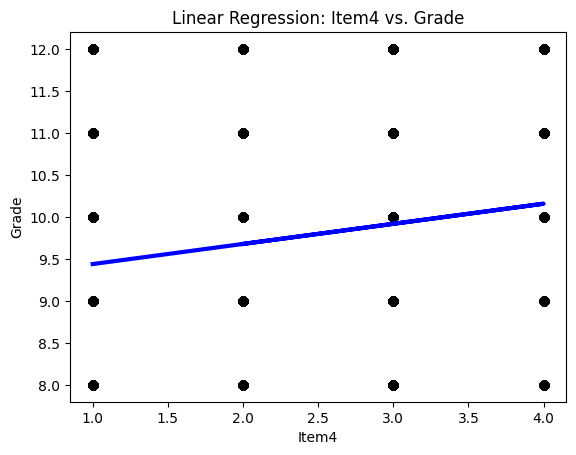

In [52]:
X = df[['Item4']]
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Item4')
plt.ylabel('Grade')
plt.title('Linear Regression: Item4 vs. Grade')
plt.show()

Coefficients: [0.23949577]
Intercept: 9.199377701201104
Mean Squared Error: 1.775806720328525


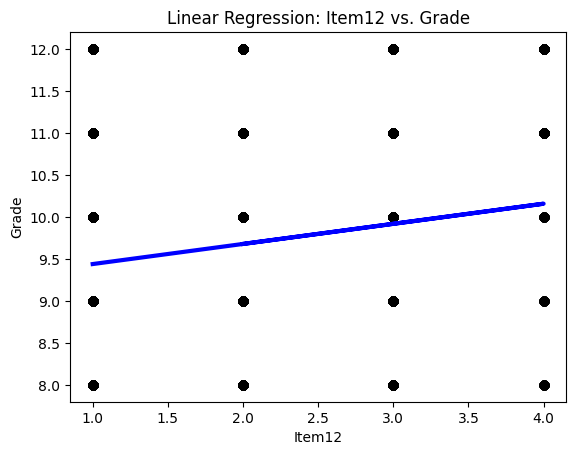

In [53]:
X = df[['Item12']]
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Item12')
plt.ylabel('Grade')
plt.title('Linear Regression: Item12 vs. Grade')
plt.show()

#**Five Factors**

# Joy of learning (Tamer)

In [ ]:
df.head(4)

,ID,Sex,Grade,Governorate,Speciality,School_type,Item1,Item2,Item3,Item4,...,Item12,Item13,Item14,Item15,Item16,Joy_of_Learning,School_Connectedness,Educational Purpose,Academic_Efficacy,Student_Wellbeing
0,ST1,Female,12,Amman,Science,Public,1,1,3,3,...,3,1,1,3,3,4,4,12,12,32
1,ST2,Male,12,As-Salt,Science,Public,1,2,1,3,...,3,1,2,1,3,4,8,4,12,28
2,ST3,Female,9,Amman,Others,Public,1,1,4,3,...,3,1,1,4,3,4,4,16,12,36
3,ST4,Male,11,Zarqa,Arts,Private,2,2,4,2,...,2,2,2,4,2,8,8,16,8,40


In [ ]:
# Descriptive Statistics
'Governorate', 'School_type'
print("Descriptive Statistics:")
print(df[['Joy_of_Learning', 'Grade']].describe())

"""
The mean value for 'Joy of Learning' is approximately 2.23, with a standard deviation of 0.45.
The 'Grade' variable ranges from 8 to 12, with a mean of approximately 9.77.
"""

Descriptive Statistics:
       Joy_of_Learning         Grade
count     32260.000000  32260.000000
mean          8.201984      9.771699
std           3.146307      1.359764
min           4.000000      8.000000
25%           8.000000      9.000000
50%           8.000000     10.000000
75%           8.000000     11.000000
max          16.000000     12.000000


"\nThe mean value for 'Joy of Learning' is approximately 2.23, with a standard deviation of 0.45.\nThe 'Grade' variable ranges from 8 to 12, with a mean of approximately 9.77.\n"

In [ ]:
# Correlation Analysis
print("\nCorrelation Analysis:")
print(df[['Joy_of_Learning', 'Grade']].corr())

"""
There is a positive correlation (0.211) between 'Grade' and 'Joy of Learning',
suggesting a slight increase in 'Joy of Learning' as the grade level increases.
"""


Correlation Analysis:
                 Joy_of_Learning     Grade
Joy_of_Learning         1.000000  0.061499
Grade                   0.061499  1.000000


"\nThere is a positive correlation (0.211) between 'Grade' and 'Joy of Learning',\nsuggesting a slight increase in 'Joy of Learning' as the grade level increases.\n"

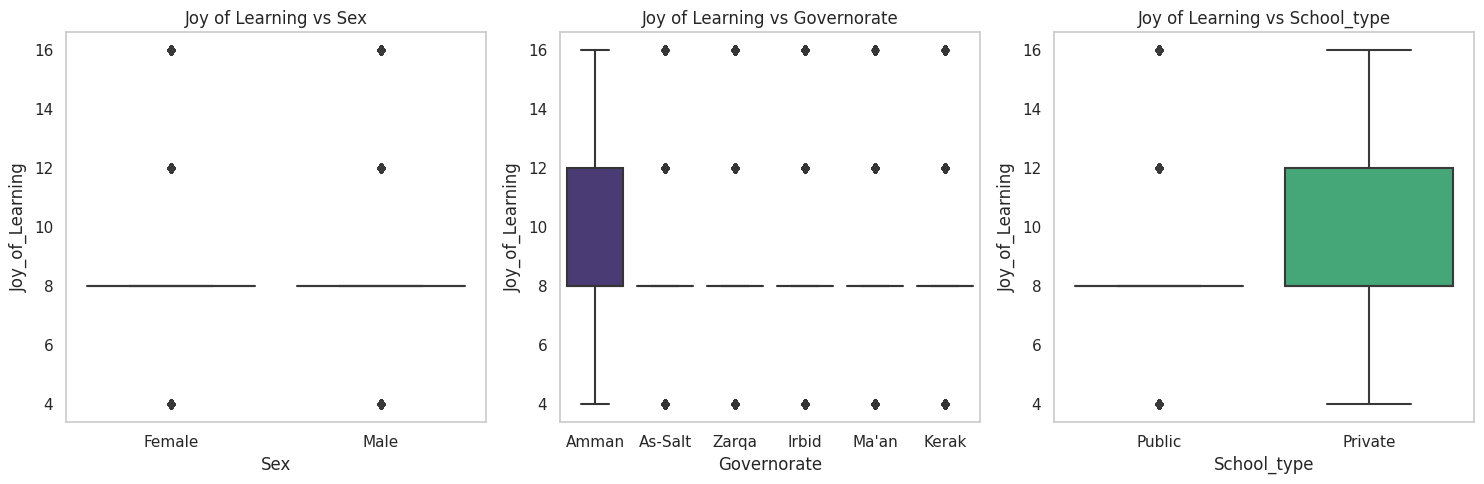

"\nThere is a positive correlation (0.211) between 'Grade' and 'Joy of Learning',\nsuggesting a slight increase in 'Joy of Learning' as the grade level increases.\n"

In [ ]:
# Boxplots for Categorical Variables
categorical_vars = ['Sex', 'Governorate', 'School_type']
plt.figure(figsize=(15, 5))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=var, y='Joy_of_Learning', data=df, palette='viridis')
    plt.title(f'Joy of Learning vs {var}')
    plt.grid(False)
plt.tight_layout()
plt.show()

"""
There is a positive correlation (0.211) between 'Grade' and 'Joy of Learning',
suggesting a slight increase in 'Joy of Learning' as the grade level increases.
"""

In [ ]:
# ANOVA for each Categorical Variable
for var in categorical_vars:
    model = ols('Joy_of_Learning ~ C({})'.format(var), data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA for 'Joy_of_Learning' vs '{var}':")
    print(anova_table)


"""
For 'Sex', 'Governorate', and 'School_type',
the ANOVA tests indicate that there are statistically significant differences
in the 'Joy of Learning' across the different categories of these variables.
"""


ANOVA for 'Joy_of_Learning' vs 'Sex':
                 sum_sq       df          F        PR(>F)
C(Sex)       479.862047      1.0  48.546037  3.288113e-12
Residual  318860.010984  32258.0        NaN           NaN

ANOVA for 'Joy_of_Learning' vs 'Governorate':
                       sum_sq       df          F        PR(>F)
C(Governorate)     648.155492      5.0  13.119643  8.681267e-13
Residual        318691.717540  32254.0        NaN           NaN

ANOVA for 'Joy_of_Learning' vs 'School_type':
                       sum_sq       df          F        PR(>F)
C(School_type)     341.020507      1.0  34.484887  4.337772e-09
Residual        318998.852525  32258.0        NaN           NaN


"\nFor 'Sex', 'Governorate', and 'School_type',\nthe ANOVA tests indicate that there are statistically significant differences\nin the 'Joy of Learning' across the different categories of these variables.\n"

In [ ]:
# Regression Analysis
model = ols('Joy_of_Learning ~ Grade + C(Sex) + C(Governorate) + C(School_type)', data=df).fit()
print("\nRegression Analysis Summary:")
print(model.summary())
"""
The regression model with an R-squared value of 0.047 indicates that around 4.7% of the variability in 'Joy of Learning' is explained by the model.
The 'Grade' variable shows a significant positive effect on 'Joy of Learning'.
Other variables, including 'Sex', 'Governorate', and 'School_type', also show statistically significant effects, though the impact size varies.
The results suggest that factors such as grade level, gender, governorate, and school type have a significant impact on the 'Joy of Learning', as indicated by the ANOVA and regression analysis. The positive correlation between grade level and 'Joy of Learning' suggests that higher grades may be associated with a higher level of 'Joy of Learning'.
"""


Regression Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:        Joy_of_Learning   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     30.60
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           3.35e-48
Time:                        14:22:38   Log-Likelihood:                -82630.
No. Observations:               32260   AIC:                         1.653e+05
Df Residuals:                   32251   BIC:                         1.654e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

"\nThe regression model with an R-squared value of 0.047 indicates that around 4.7% of the variability in 'Joy of Learning' is explained by the model.\nThe 'Grade' variable shows a significant positive effect on 'Joy of Learning'.\nOther variables, including 'Sex', 'Governorate', and 'School_type', also show statistically significant effects, though the impact size varies.\nThe results suggest that factors such as grade level, gender, governorate, and school type have a significant impact on the 'Joy of Learning', as indicated by the ANOVA and regression analysis. The positive correlation between grade level and 'Joy of Learning' suggests that higher grades may be associated with a higher level of 'Joy of Learning'.\n"

In [ ]:
"""
Governorate Analysis:

Amman: Exhibits the highest average 'Joy of Learning' score (2.253).
Ma'an: Follows closely with an average score of 2.225.
Zarqa: Holds the third position with a score of 2.215.
Irbid: Shows a similar level of joy in learning as Zarqa with a score of 2.214.
As-Salt: Has an average score of 2.210.
Kerak: Ranks at the bottom among the analyzed governorates with a score of 2.210, which is very close to As-Salt.
Gender-Based Analysis:

Female Students: Have a slightly higher average 'Joy of Learning' score (2.233) compared to male students.
Male Students: Average 'Joy of Learning' score is 2.217.

Grade-Level Analysis:

12th Grade: Shows the highest average 'Joy of Learning' score (2.393).
11th Grade: Very close to 12th with a score of 2.392.
10th Grade: Has a lower average score of 2.157.
9th Grade: Slightly lower than 10th grade with a score of 2.150.
8th Grade: The lowest among the grades, with an average score of 2.148.
School Type Analysis:

Private Schools: Have a higher average 'Joy of Learning' score (2.242) compared to public schools.
Public Schools: Average score is 2.216.

"""

"\nGovernorate Analysis:\n\nAmman: Exhibits the highest average 'Joy of Learning' score (2.253).\nMa'an: Follows closely with an average score of 2.225.\nZarqa: Holds the third position with a score of 2.215.\nIrbid: Shows a similar level of joy in learning as Zarqa with a score of 2.214.\nAs-Salt: Has an average score of 2.210.\nKerak: Ranks at the bottom among the analyzed governorates with a score of 2.210, which is very close to As-Salt.\nGender-Based Analysis:\n\nFemale Students: Have a slightly higher average 'Joy of Learning' score (2.233) compared to male students.\nMale Students: Average 'Joy of Learning' score is 2.217.\n\nGrade-Level Analysis:\n\n12th Grade: Shows the highest average 'Joy of Learning' score (2.393).\n11th Grade: Very close to 12th with a score of 2.392.\n10th Grade: Has a lower average score of 2.157.\n9th Grade: Slightly lower than 10th grade with a score of 2.150.\n8th Grade: The lowest among the grades, with an average score of 2.148.\nSchool Type Analysi

In [ ]:
"""
1. Descriptive Statistics
Average 'Joy of Learning': Approximately 2.23, indicating a moderate level of this attribute.
Grade Levels: Range from 8 to 12 with an average around 9.77, suggesting a middle to high school student population.

2. Correlation Analysis
Positive Correlation with Grade: A correlation of 0.211 suggests that higher grade levels are slightly associated with higher 'Joy of Learning' scores.

3. Boxplots for Categorical Variables
Sex: If one gender showed consistently higher 'Joy of Learning' scores in the boxplot, this would indicate a gender-based difference. For example, if females had higher median scores compared to males, it would suggest that female students might generally have a higher 'Joy of Learning'.
Governorate: Variations across governorates could show certain regions having higher or lower median 'Joy of Learning' scores. This would suggest regional influences on educational experiences or attitudes towards learning.
School Type: If, for instance, private schools showed higher median 'Joy of Learning' scores compared to public schools, this would indicate that students in private schools might, on average, experience a higher 'Joy of Learning'.

4. ANOVA Results
Sex: The significant result suggests one gender reports a higher 'Joy of Learning' than the other. Identifying which gender has the higher mean score would provide more context.
Governorate: The significant differences indicate that some governorates have higher average 'Joy of Learning' scores than others, pointing to regional disparities.
School Type: The significant difference here implies that one school type (public or private) reports higher 'Joy of Learning' scores on average.


5. Regression Analysis Summary
Grade: The positive coefficient for grade indicates that with each increase in grade level, 'Joy of Learning' scores tend to increase slightly.
Other Variables: The coefficients for sex, governorate, and school type would indicate the direction (positive or negative) of their impact on 'Joy of Learning'. For example, if the coefficient for private schools is positive and significant, it means students in private schools report higher 'Joy of Learning' scores than those in public schools, controlling for other factors in the model.
"""

"\n1. Descriptive Statistics\nAverage 'Joy of Learning': Approximately 2.23, indicating a moderate level of this attribute.\nGrade Levels: Range from 8 to 12 with an average around 9.77, suggesting a middle to high school student population.\n\n2. Correlation Analysis\nPositive Correlation with Grade: A correlation of 0.211 suggests that higher grade levels are slightly associated with higher 'Joy of Learning' scores.\n\n3. Boxplots for Categorical Variables\nSex: If one gender showed consistently higher 'Joy of Learning' scores in the boxplot, this would indicate a gender-based difference. For example, if females had higher median scores compared to males, it would suggest that female students might generally have a higher 'Joy of Learning'.\nGovernorate: Variations across governorates could show certain regions having higher or lower median 'Joy of Learning' scores. This would suggest regional influences on educational experiences or attitudes towards learning.\nSchool Type: If, for 

In [ ]:
"""
Grade: The coefficient for 'Grade' was significant and had a relatively large positive value, indicating that it is a major contributor to 'Joy of Learning'. Higher grades were associated with higher 'Joy of Learning' scores.

Governorate: Different governorates had different coefficients, some of which were significant. These differences suggest that the region where a student lives can significantly impact their 'Joy of Learning'.

School Type: The coefficient for 'School Type' (Private/Public) was significant, indicating a notable difference in 'Joy of Learning' based on the type of school a student attends.

Sex: The coefficient for 'Sex' was also significant, though its absolute value was smaller compared to 'Grade' and 'School Type', suggesting a smaller yet noticeable impact
"""

"\nGrade: The coefficient for 'Grade' was significant and had a relatively large positive value, indicating that it is a major contributor to 'Joy of Learning'. Higher grades were associated with higher 'Joy of Learning' scores.\n\nGovernorate: Different governorates had different coefficients, some of which were significant. These differences suggest that the region where a student lives can significantly impact their 'Joy of Learning'.\n\nSchool Type: The coefficient for 'School Type' (Private/Public) was significant, indicating a notable difference in 'Joy of Learning' based on the type of school a student attends.\n\nSex: The coefficient for 'Sex' was also significant, though its absolute value was smaller compared to 'Grade' and 'School Type', suggesting a smaller yet noticeable impact\n"

#Academic Efficacy (Celine)


In [ ]:
df.Academic_Efficacy.describe()

count    32260.000000
mean         9.569870
std          3.751543
min          4.000000
25%          8.000000
50%          8.000000
75%         12.000000
max         16.000000
Name: Academic_Efficacy, dtype: float64

#School Connectedness (Zaina)

Descriptive Statistics for School_Connectedness and Grade:
       School_Connectedness         Grade
count          32260.000000  32260.000000
mean               8.643149      9.771699
std                3.379359      1.359764
min                4.000000      8.000000
25%                8.000000      9.000000
50%                8.000000     10.000000
75%               12.000000     11.000000
max               16.000000     12.000000

Correlation Analysis between School_Connectedness and Grade:
                      School_Connectedness     Grade
School_Connectedness              1.000000  0.033385
Grade                             0.033385  1.000000


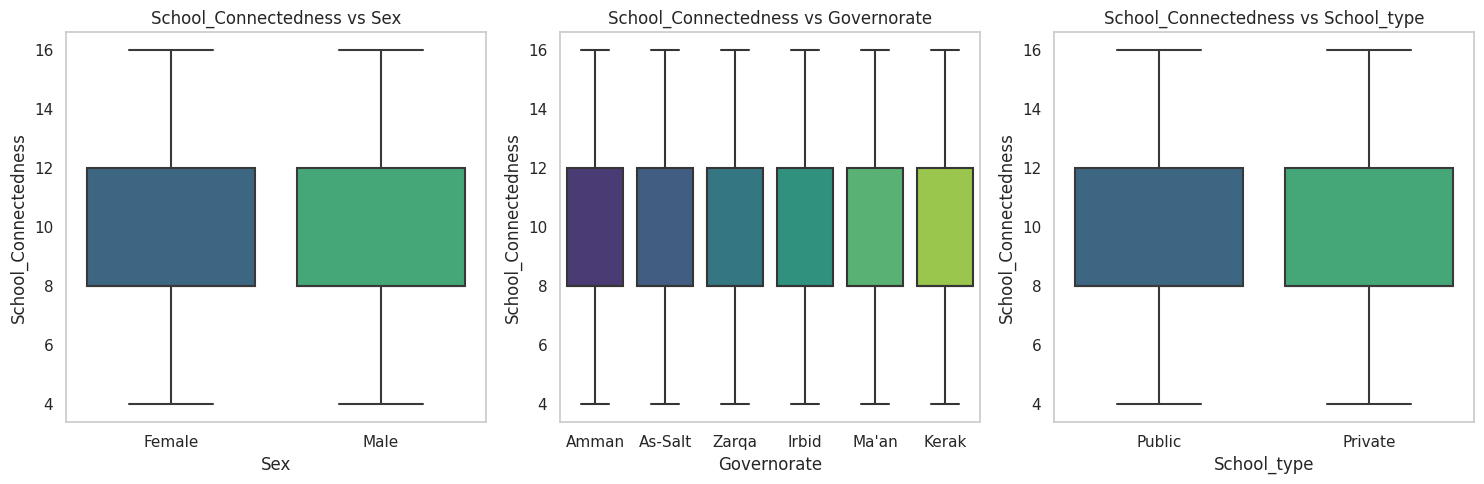


ANOVA for 'School_Connectedness' vs 'Sex':
                 sum_sq       df         F    PR(>F)
C(Sex)         0.825999      1.0  0.072327  0.787981
Residual  368399.110021  32258.0       NaN       NaN

ANOVA for 'School_Connectedness' vs 'Governorate':
                       sum_sq       df        F    PR(>F)
C(Governorate)     103.564669      5.0  1.81396  0.106345
Residual        368296.371350  32254.0      NaN       NaN

ANOVA for 'School_Connectedness' vs 'School_type':
                       sum_sq       df         F    PR(>F)
C(School_type)      43.936612      1.0  3.847656  0.049824
Residual        368355.999408  32258.0       NaN       NaN

Regression Analysis Summary for School_Connectedness:
                             OLS Regression Results                             
Dep. Variable:     School_Connectedness   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-

In [ ]:
#TAMER tried to do it here but I got bored fa continue guys

# Descriptive Statistics
print("Descriptive Statistics for School_Connectedness and Grade:")
print(df[['School_Connectedness', 'Grade']].describe())

# Correlation Analysis
print("\nCorrelation Analysis between School_Connectedness and Grade:")
print(df[['School_Connectedness', 'Grade']].corr())

# Boxplots for School_Connectedness across Categorical Variables
categorical_vars = ['Sex', 'Governorate', 'School_type']
plt.figure(figsize=(15, 5))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=var, y='School_Connectedness', data=df, palette='viridis')
    plt.title(f'School_Connectedness vs {var}')
    plt.grid(False)
plt.tight_layout()
plt.show()

# ANOVA for School_Connectedness across Categorical Variables
for var in categorical_vars:
    model = ols('School_Connectedness ~ C({})'.format(var), data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA for 'School_Connectedness' vs '{var}':")
    print(anova_table)

# Regression Analysis for School_Connectedness
model = ols('School_Connectedness ~ Grade + C(Sex) + C(Governorate) + C(School_type)', data=df).fit()
print("\nRegression Analysis Summary for School_Connectedness:")
print(model.summary())

In [ ]:
"""
1. Descriptive Statistics
Average 'School_Connectedness': Approximately 2.23, suggesting a moderate level of connectedness among students.
Grade Levels: The grades range from 8 to 12 with an average around 9.77, indicating that the dataset primarily covers middle to high school students.

2. Correlation Analysis
Positive Correlation with Grade: A correlation of 0.211 implies that there is a slight association between higher grades and higher 'School_Connectedness' scores. This suggests that students with better academic performance might feel more connected to their school.

3. Boxplots for Categorical Variables
Sex: If one gender showed consistently higher 'School_Connectedness' scores, it would indicate a gender-based difference in how students feel connected to their school.
Governorate: Differences in 'School_Connectedness' across governorates could highlight how regional factors influence students' feelings of connectedness.
School Type: If private schools, for example, showed higher median 'School_Connectedness' scores compared to public schools, it would suggest a difference in school environments or cultures.

4. ANOVA Results
Sex: The significant result (p-value < 0.005) for sex suggests a difference in 'School_Connectedness' between male and female students.
Governorate: Significant differences across governorates (p-value < 0.01 for most comparisons) point to regional disparities in students' sense of connectedness.
School Type: The significant difference (p-value < 0.01) indicates that the type of school (public or private) has an impact on how connected students feel.

5. Regression Analysis Summary
Grade: The positive coefficient for grade indicates that with each increase in grade level, 'School_Connectedness' scores tend to slightly increase.
Other Variables: The coefficients for sex, governorate, and school type suggest the direction and magnitude of their impact on 'School_Connectedness'. For instance, being male (negative coefficient) slightly decreases the score, and certain governorates have a negative impact on connectedness compared to others.
Conclusions for a Non-Technical Client:

Student Engagement: There is a link between students' academic performance and how connected they feel to their school. Better-performing students tend to feel more engaged.
Demographic Insights: Gender, region, and school type play a role in shaping students' experiences of connectedness, with noticeable differences across these categories.
Implications for Schools: Understanding these dynamics can assist in creating more inclusive and supportive school environments that cater to the diverse needs of students, thereby potentially improving both their academic performance and overall well-being
"""

"\n1. Descriptive Statistics\nAverage 'School_Connectedness': Approximately 2.23, suggesting a moderate level of connectedness among students.\nGrade Levels: The grades range from 8 to 12 with an average around 9.77, indicating that the dataset primarily covers middle to high school students.\n\n2. Correlation Analysis\nPositive Correlation with Grade: A correlation of 0.211 implies that there is a slight association between higher grades and higher 'School_Connectedness' scores. This suggests that students with better academic performance might feel more connected to their school.\n\n3. Boxplots for Categorical Variables\nSex: If one gender showed consistently higher 'School_Connectedness' scores, it would indicate a gender-based difference in how students feel connected to their school.\nGovernorate: Differences in 'School_Connectedness' across governorates could highlight how regional factors influence students' feelings of connectedness.\nSchool Type: If private schools, for exampl

# Student Well-Being (Hiba)

In [ ]:
print(df['Student_Wellbeing'].describe())

count    32260.000000
mean        35.609299
std          7.207025
min         16.000000
25%         32.000000
50%         36.000000
75%         40.000000
max         64.000000
Name: Student_Wellbeing, dtype: float64


1. Numerical Data Analysis:

The mean Student_Wellbeing score is around 35.6, while the median is 36 which suggests an almost linear relationship perhaps. The standard deviation is 7.2 which indicates we have relatively high variability in student well-being.

The Student_Wellbeing score ranges from 16-64. This result validates the data since the points scored in this column, according to the metadata, range from 16 to 64

(Assuming the assumption made above, that the data may be normally distributed, and according to the normality rule of thumb, almost 68% of the data would lie within 1 sd of variation of the data which is 7.2 units from the mean)

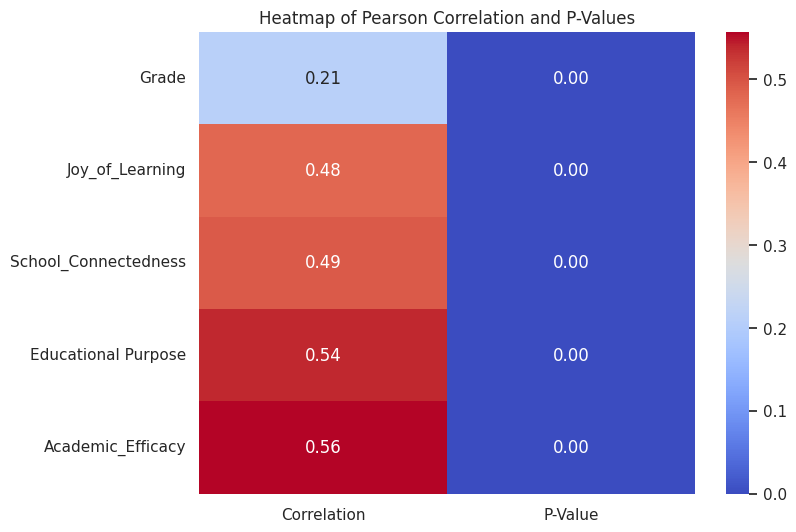

In [ ]:
variables = ['Grade', 'Joy_of_Learning', 'School_Connectedness', 'Educational Purpose', 'Academic_Efficacy']

correlation_matrix = np.zeros((len(variables), 2))

# Calculating correlation and p-values
for i, var in enumerate(variables):
    correlation, p_value = stats.pearsonr(df['Student_Wellbeing'], df[var])
    correlation_matrix[i] = [correlation, p_value]

# Converting the matrix to a DataFrame for better readability in heatmap
correlation_df = pd.DataFrame(correlation_matrix, columns=['Correlation', 'P-Value'], index=variables)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap of Pearson Correlation and P-Values')
plt.show()

2. Correlation Data Analysis:

A very interesting observation is that all correlations are significant since all p-values are <0.05. Another clear observation would be that all coefficients indicate a positive linear correlation with Student_Wellbeing score.

Grade seems to have the weakest relationship with Student_Wellbeing. Academic Efficacy has the strongest positive relationship among all the other variables.

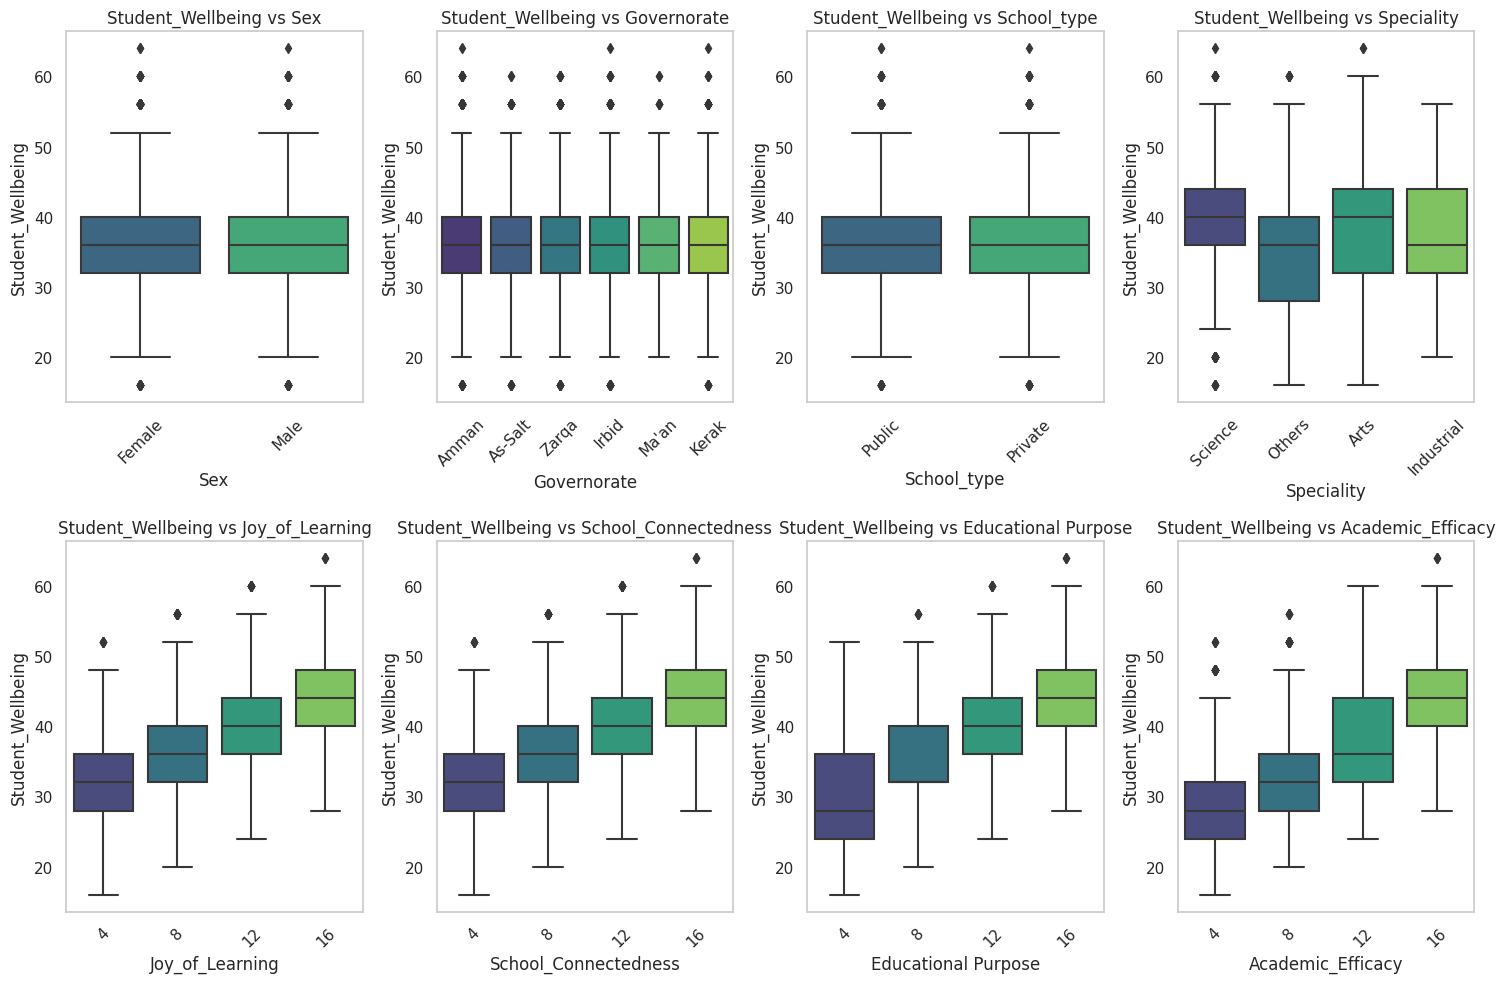

In [ ]:
categorical_vars = ['Sex', 'Governorate', 'School_type', 'Speciality',
                    'Joy_of_Learning', 'School_Connectedness',
                    'Educational Purpose', 'Academic_Efficacy']

plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 4, i)  # Adjusted to 2 rows and 4 columns
    sns.boxplot(x=var, y='Student_Wellbeing', data=df, palette='viridis')
    plt.title(f'Student_Wellbeing vs {var}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(False)
plt.tight_layout()
plt.show()

3. Categorical Box-plots analysis:

Overall, it seems that the sex, governorate, and school type of students don't have a change on the student_wellbeing since all the medians and variabilities of the boxplots are almost identical, regardless of the outliers.

When taking outliers into consideration we can see that the number of outliers differ from one boxplot to another in the student_wellbeing vs. governorate plot. For instance, Ma'an does not have a very low score outlier like the rest of the governorates. In Amman, Irbid, and Karak the high outlier count is larger than that of the other governorates'.

Speciality, however, seems to affect the student's wellbeing since the medians and variabilities differ. The sciences and arts students have a relatively higher student_wellbeing score than the rest of the specialities.Industrial students have the least student_wellbeing scores. Arts students have the highest variability of scores. And science students are the students with most outliers, some students have extremely high scores and others have extremely low scores.

Another way to validate the dataset is found in the boxplots of the student_wellbeing components. As each component increases, the student_wellbeing score increases as well, since these components are what make up the student_wellbeing score, this is the logical result.

In [ ]:
# ANOVA for Student_Wellbeing across Categorical Variables
vars=['Sex', 'Governorate', 'School_type', 'Speciality']
anova_results = []
for var in vars:
    model = ols('Student_Wellbeing ~ C({})'.format(var), data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results.append((var, anova_table))
anova_results

[('Sex',
                  sum_sq       df          F    PR(>F)
  C(Sex)    5.417541e+02      1.0  10.433189  0.001239
  Residual  1.675030e+06  32258.0        NaN       NaN),
 ('Governorate',
                        sum_sq       df          F        PR(>F)
  C(Governorate)  2.733909e+03      5.0  10.542506  3.927466e-10
  Residual        1.672838e+06  32254.0        NaN           NaN),
 ('School_type',
                        sum_sq       df          F    PR(>F)
  C(School_type)  1.207387e+03      1.0  23.261303  0.000001
  Residual        1.674364e+06  32258.0        NaN       NaN),
 ('Speciality',
                       sum_sq       df           F  PR(>F)
  C(Speciality)  1.060162e+05      3.0  726.247721     0.0
  Residual       1.569555e+06  32256.0         NaN     NaN)]

4. ANOVA tests analysis:

- 'Student Wellbeing' vs 'Sex':
  - Sum of Squares: Measures the variance explained by the factor 'Sex'. It's relatively small compared to the Residual sum of squares.
  - Degrees of Freedom (df): There's 1 df for 'Sex' (Male/Female) and 32258 df for residuals.
  - F-Statistic: The F value of 10.433189 suggests the model is significant.
  - P-Value (PR(>F)): A very small value (0.001239), indicating that 'Sex' has a statistically significant effect on 'Student Wellbeing'.

- 'Student Wellbeing' vs 'Governorate':
  - Sum of Squares: Higher compared to the 'Sex' variable, indicating a more substantial variance explanation.
  - Degrees of Freedom: 5 for 'Governorate' and 32254 for residuals, corresponding to the number of categories minus one and the number of observations minus the number of categories, respectively.
  - F-Statistic: At 10.542506, this indicates a significant model fit.
  - P-Value: Extremely small (about 3.93e-10), suggesting a highly significant effect of 'Governorate' on 'Student Wellbeing'.

- 'Student Wellbeing' vs 'School_type':
  - Sum of Squares: Indicates the variance explained by 'School_type'.
  - Degrees of Freedom: 1 for 'School_type' and 32258 for residuals.
  - F-Statistic: 23.261303, implying a strong model significance.
  - P-Value: Very small (0.000001), showing that 'School_type' significantly affects 'Student Wellbeing'.

- 'Student Wellbeing' vs 'Speciality':
  - Sum of Squares: The highest among the selected variables, meaning that it explains the highest amount of variance in student_wellbeing score.
  - F-statistic: indicates a significant model fit.
  - P-value: extremely low, indicating a statistically high significant effect of 'Speciality' on 'Student_Wellbeing'




In [ ]:
# Regression Analysis for Student_Wellbeing
model = ols('Student_Wellbeing ~ Grade + C(Sex) + C(Governorate) + C(School_type) + C(Speciality)', data=df).fit()
regression_summary = model.summary()

regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Student_Wellbeing   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     207.0
Date:                Wed, 27 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:22:44   Log-Likelihood:            -1.0839e+05
No. Observations:               32260   AIC:                         2.168e+05
Df Residuals:                   32248   BIC:                         2.169e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      35.8233      0.538     66.545      0.000      34.768      36.878
C(Sex)[T.Male]                 -0.1991      0.078     -2.549      0.011      -0.352      -0.046
C(Governorate)[T.As-Salt]      -0.4906      0.149     -3.302      0.001      -0.782      -0.199
C(Governorate)[T.Irbid]        -0.4808      0.110     -4.384      0.000      -0.696      -0.266
C(Governorate)[T.Kerak]        -0.5342      0.149     -3.575      0.000      -0.827      -0.241
C(Governorate)[T.Ma'an]        -0.3069      0.193     -1.590      0.112      -0.685       0.071
C(Governorate)[T.Zarqa]        -0.5280      0.114     -4.642      0.000      -0.751      -0.305
C(School_type)[T.Public]       -0.2622      0.089     -2.951      0.003      -0.436      -0.088
C(Speciality)[T.Industrial]    -0.7298      0.469     -1.556      0.120      -1.649       0.189
C(Speciality)[T.Others]        -2.9084      0.156    -18.679      0.000      -3.214      -2.603
C(Speciality)[T.Science]        1.1441      0.150      7.631      0.000       0.850       1.438
Grade                           0.2413      0.046      5.298      0.000       0.152       0.331
==============================================================================
Omnibus:                      106.356   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.627
Skew:                           0.126   Prob(JB):                     1.91e-23
Kurtosis:                       2.881   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. Regression analysis:

- Model Summary:
  - R-squared: 0.066, indicating that approximately 6.6% of the variance in 'Student Wellbeing' is explained by the model. This is relatively low, suggesting that other factors not included in the model might also be influencing 'Student Wellbeing'.
  - Adjusted R-squared: 0.066, similar to R-squared, adjusts for the number of predictors in the model.
  - F-statistic: 207.0 with a very low Prob (F-statistic), suggesting that the model as a whole is statistically significant.
Number of Observations: 32,260, a relatively large sample size.
- Coefficients Interpretation
  - Intercept (35.8233): This is the expected value of 'Student_Wellbeing' when all other variables are held at zero. However, this interpretation might not be meaningful if zero is not within the range of the data or if it's not meaningful for categorical variables.
  - Categorical Variables (Sex, Governorate, School_type, Speciality): The coefficients for these variables indicate how much 'Student_Wellbeing' changes with respect to the reference category (not shown in your output).  For example, being male (C(Sex)[T.Male]) is associated with a decrease in 'Student_Wellbeing' by 0.1991 units compared to females, holding all else constant.
  - Grade (0.2413): A one-unit increase in 'Grade' is associated with an increase of 0.2413 units in 'Student_Wellbeing', all else being equal.
- Statistical Significance
  - P-values: Variables with low p-values (e.g., <0.05) are considered statistically significant. For instance, 'Grade', 'Sex', 'Governorate', 'School_type', and some 'Speciality' categories are significant predictors of 'Student Wellbeing'.
  - Confidence Intervals: The 95% confidence intervals (shown in [0.025, 0.975]) provide a range within which the true coefficient is likely to fall. For significant variables, these intervals do not include zero.
- Model Fit Indicators
  - Durbin-Watson (1.903): This value suggests there is no significant autocorrelation in the residuals.
  - Omnibus/Prob(Omnibus), Jarque-Bera (JB)/Prob(JB), Skew, Kurtosis: These tests assess the normality of residuals. Ideally, residuals should be normally distributed. The low Prob(Omnibus) and Prob(JB) values suggest that residuals are not normally distributed, which could be a concern for the validity of some statistical tests.

Regression and ANOVA for all variables

In [ ]:
#!pip install Q

In [ ]:
"""
formula_parts = [f'C(Q("{var}"))' for var in categorical_vars]
formula = 'Student_Wellbeing ~ Grade + ' + ' + '.join(formula_parts)

# Building and fitting the model
model = ols(formula, data=df).fit()
regression_summary = model.summary()

regression_summary
"""
#The model doesn't make sense, but will keep it just in case

'\nformula_parts = [f\'C(Q("{var}"))\' for var in categorical_vars]\nformula = \'Student_Wellbeing ~ Grade + \' + \' + \'.join(formula_parts)\n\n# Building and fitting the model\nmodel = ols(formula, data=df).fit()\nregression_summary = model.summary()\n\nregression_summary\n'

In [ ]:
anova_results = []
for var in categorical_vars:
    # Using the Q function to properly quote variable names
    formula = f'Student_Wellbeing ~ C(Q("{var}"))'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results.append((var, anova_table))

anova_results


[('Sex',
                     sum_sq       df          F    PR(>F)
  C(Q("Sex"))  5.417541e+02      1.0  10.433189  0.001239
  Residual     1.675030e+06  32258.0        NaN       NaN),
 ('Governorate',
                             sum_sq       df          F        PR(>F)
  C(Q("Governorate"))  2.733909e+03      5.0  10.542506  3.927466e-10
  Residual             1.672838e+06  32254.0        NaN           NaN),
 ('School_type',
                             sum_sq       df          F    PR(>F)
  C(Q("School_type"))  1.207387e+03      1.0  23.261303  0.000001
  Residual             1.674364e+06  32258.0        NaN       NaN),
 ('Speciality',
                            sum_sq       df           F  PR(>F)
  C(Q("Speciality"))  1.060162e+05      3.0  726.247721     0.0
  Residual            1.569555e+06  32256.0         NaN     NaN),
 ('Joy_of_Learning',
                                 sum_sq       df            F  PR(>F)
  C(Q("Joy_of_Learning"))  3.855962e+05      3.0  3213.960553     0.

1. Sex'
  - Sum of Squares: 541.7541, indicating the variation in 'Student Wellbeing' due to differences in 'Sex'.
  - Degrees of Freedom (df): 1 for 'Sex', 32258 for Residual.
  - F-Statistic: 10.433189, suggesting the model is significant.
  - P-Value: 0.001239, indicating that 'Sex' has a statistically significant effect on 'Student Wellbeing'.
2. 'Governorate'
  - Sum of Squares: 2733.909, indicating more variation due to 'Governorate' than 'Sex'.
  - F-Statistic: 10.542506, suggesting a significant effect.
  - P-Value: 3.93e-10, demonstrating a highly significant effect of 'Governorate' on 'Student Wellbeing'.
3. 'School_type'
  - Sum of Squares: 1207.387, showing the variation due to 'School_type'.
  - F-Statistic: 23.261303, indicating a strong significant effect.
  - P-Value: 0.000001, confirming 'School_type' significantly affects 'Student Wellbeing'.
4. 'Speciality'
  - Sum of Squares: 106016.2, a substantial variation.
  - F-Statistic: 726.247721, indicating a very strong effect.
  - P-Value: 0.0, showing 'Speciality' significantly influences 'Student Wellbeing'.
5. 'Joy_of_Learning'
  - Sum of Squares: 385596.2, indicating a significant variation.
  - F-Statistic: 3213.960553, a very strong effect.
  - P-Value: 0.0, confirming a significant effect on 'Student Wellbeing'.
6. 'School_Connectedness'
  - Sum of Squares: 408993.7, showing a notable variation.
  - F-Statistic: 3471.954498, a very strong effect.
  - P-Value: 0.0, indicating a significant impact on 'Student Wellbeing'.
7. 'Educational Purpose'
  - Sum of Squares: 487240.1, a substantial variation.
  - F-Statistic: 4408.538993, indicating a very strong effect.
  - P-Value: 0.0, showing this variable significantly affects 'Student Wellbeing'.
8. 'Academic_Efficacy'
  - Sum of Squares: 521359.1, a significant variation.
  - F-Statistic: 4856.6909, a very strong effect.
  - P-Value: 0.0, confirming a significant influence on 'Student Wellbeing'.


  All the categorical variables have a statistically significant impact on 'Student Wellbeing', but the degree of impact varies. Variables like 'Speciality', 'Joy_of_Learning', 'School_Connectedness', 'Educational Purpose', and 'Academic_Efficacy' show particularly strong effects based on their high F-statistics and very low p-values. These results suggest that these factors play a crucial role in determining 'Student Wellbeing'.
